###DATASET 1

In [3]:
#importing required libraries
%pip install plotly==5.8.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
import statsmodels.api as sm
import plotly.express as px
from google.colab import files
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00


In [ ]:
#Reading the dataset
df = pd.read_csv('/content/data (2).csv')

In [ ]:
df.head(10)

Unnamed: 0        Brand                          Model  AccelSec  \
0           0       Tesla   Model 3 Long Range Dual Motor    4.6000   
1           1  Volkswagen                       ID.3 Pure   10.0000   
2           2    Polestar                               2    4.7000   
3           3         BMW                            iX3     6.8000   
4           4       Honda                              e     9.5000   
5           5       Lucid                            Air     2.8000   
6           6  Volkswagen                         e-Golf     9.6000   
7           7     Peugeot                          e-208     8.1000   
8           8       Tesla     Model 3 Standard Range Plus    5.6000   
9           9        Audi                      Q4 e-tron     6.3000   

   TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0           233       450              161             940         Yes   
1           160       270              167             250          No   
2           210       400              181             620         Yes   
3           180       360              206             560         Yes   
4           145       170              168             190         Yes   
5           250       610              180             620         Yes   
6           150       190              168             220          No   
7           150       275              164             420          No   
8           225       310              153             650         Yes   
9           180       400              193             540         Yes   

  PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  
0        AWD  Type 2 CCS      Sedan       D      5      55480  
1        RWD  Type 2 CCS  Hatchback       C      5      30000  
2        AWD  Type 2 CCS   Liftback       D      5      56440  
3        RWD  Type 2 CCS        SUV       D      5      68040  
4        RWD  Type 2 CCS  Hatchback       B      4      32997  
5        AWD  Type 2 CCS      Sedan       F      5     105000  
6        FWD  Type 2 CCS  Hatchback       C      5      31900  
7        FWD  Type 2 CCS  Hatchback       B      5      29682  
8        RWD  Type 2 CCS      Sedan       D      5      46380  
9        AWD  Type 2 CCS        SUV       D      5      55000

In [ ]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis =1 , inplace=True)

In [ ]:
df

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor    4.6000           233   
1    Volkswagen                         ID.3 Pure   10.0000           160   
2      Polestar                                 2    4.7000           210   
3           BMW                              iX3     6.8000           180   
4         Honda                                e     9.5000           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh    7.5000           160   
99         Audi     e-tron S Sportback 55 quattro    4.5000           210   
100      Nissan               Ariya e-4ORCE 63kWh    5.9000           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance    5.1000           200   
102       Byton                 M-Byte 95 kWh 2WD    7.5000           190   

     Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
0         450              161             940         Yes        AWD   
1         270              167             250          No        RWD   
2         400              181             620         Yes        AWD   
3         360              206             560         Yes        RWD   
4         170              168             190         Yes        RWD   
..        ...              ...             ...         ...        ...   
98        330              191             440         Yes        FWD   
99        335              258             540         Yes        AWD   
100       325              194             440         Yes        AWD   
101       375              232             450         Yes        AWD   
102       400              238             480          No        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro  
0    Type 2 CCS      Sedan       D      5      55480  
1    Type 2 CCS  Hatchback       C      5      30000  
2    Type 2 CCS   Liftback       D      5      56440  
3    Type 2 CCS        SUV       D      5      68040  
4    Type 2 CCS  Hatchback       B      4      32997  
..          ...        ...     ...    ...        ...  
98   Type 2 CCS  Hatchback       C      5      45000  
99   Type 2 CCS        SUV       E      5      96050  
100  Type 2 CCS  Hatchback       C      5      50000  
101  Type 2 CCS  Hatchback       C      5      65000  
102  Type 2 CCS        SUV       E      5      62000  

[103 rows x 14 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
df['RapidCharge'] = l1.fit_transform(df['RapidCharge'])

In [ ]:
df['INR'] = df['PriceEuro']*89.88

In [ ]:
df

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor    4.6000           233   
1    Volkswagen                         ID.3 Pure   10.0000           160   
2      Polestar                                 2    4.7000           210   
3           BMW                              iX3     6.8000           180   
4         Honda                                e     9.5000           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh    7.5000           160   
99         Audi     e-tron S Sportback 55 quattro    4.5000           210   
100      Nissan               Ariya e-4ORCE 63kWh    5.9000           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance    5.1000           200   
102       Byton                 M-Byte 95 kWh 2WD    7.5000           190   

     Range_Km  Efficiency_WhKm  FastCharge_KmH  RapidCharge PowerTrain  \
0         450              161             940            1        AWD   
1         270              167             250            0        RWD   
2         400              181             620            1        AWD   
3         360              206             560            1        RWD   
4         170              168             190            1        RWD   
..        ...              ...             ...          ...        ...   
98        330              191             440            1        FWD   
99        335              258             540            1        AWD   
100       325              194             440            1        AWD   
101       375              232             450            1        AWD   
102       400              238             480            0        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro          INR  
0    Type 2 CCS      Sedan       D      5      55480 4986542.4000  
1    Type 2 CCS  Hatchback       C      5      30000 2696400.0000  
2    Type 2 CCS   Liftback       D      5      56440 5072827.2000  
3    Type 2 CCS        SUV       D      5      68040 6115435.2000  
4    Type 2 CCS  Hatchback       B      4      32997 2965770.3600  
..          ...        ...     ...    ...        ...          ...  
98   Type 2 CCS  Hatchback       C      5      45000 4044600.0000  
99   Type 2 CCS        SUV       E      5      96050 8632974.0000  
100  Type 2 CCS  Hatchback       C      5      50000 4494000.0000  
101  Type 2 CCS  Hatchback       C      5      65000 5842200.0000  
102  Type 2 CCS        SUV       E      5      62000 5572560.0000  

[103 rows x 15 columns]

In [ ]:
df[(df['Brand'] == 'Tesla ') | (df['Brand'] == 'BMW ')]

Brand                           Model  AccelSec  TopSpeed_KmH  Range_Km  \
0   Tesla    Model 3 Long Range Dual Motor    4.6000           233       450   
3     BMW                             iX3     6.8000           180       360   
8   Tesla      Model 3 Standard Range Plus    5.6000           225       310   
13    BMW                              i4     4.0000           200       450   
21  Tesla    Model Y Long Range Dual Motor    5.1000           217       425   
24  Tesla   Model 3 Long Range Performance    3.4000           261       435   
28    BMW                        i3 120 Ah    7.3000           150       235   
33  Tesla             Cybertruck Tri Motor    3.0000           210       750   
40  Tesla               Model S Long Range    3.8000           250       515   
51  Tesla                        Roadster     2.1000           410       970   
54  Tesla               Model X Long Range    4.6000           250       450   
59  Tesla              Model S Performance    2.5000           261       505   
61  Tesla   Model Y Long Range Performance    3.7000           241       410   
67  Tesla            Cybertruck Dual Motor    5.0000           190       460   
70    BMW                       i3s 120 Ah    6.9000           160       230   
81  Tesla              Model X Performance    2.8000           250       440   
86  Tesla          Cybertruck Single Motor    7.0000           180       390   

    Efficiency_WhKm  FastCharge_KmH  RapidCharge PowerTrain    PlugType  \
0               161             940            1        AWD  Type 2 CCS   
3               206             560            1        RWD  Type 2 CCS   
8               153             650            1        RWD  Type 2 CCS   
13              178             650            1        RWD  Type 2 CCS   
21              171             930            1        AWD  Type 2 CCS   
24              167             910            1        AWD  Type 2 CCS   
28              161             270            0        RWD  Type 2 CCS   
33              267             710            1        AWD  Type 2 CCS   
40              184             560            1        AWD      Type 2   
51              206             920            1        AWD  Type 2 CCS   
54              211             490            1        AWD      Type 2   
59              188             550            1        AWD      Type 2   
61              177             900            1        AWD  Type 2 CCS   
67              261             710            1        AWD  Type 2 CCS   
70              165             260            1        RWD  Type 2 CCS   
81              216             480            1        AWD      Type 2   
86              256             740            0        RWD  Type 2 CCS   

    BodyStyle Segment  Seats  PriceEuro           INR  
0       Sedan       D      5      55480  4986542.4000  
3         SUV       D      5      68040  6115435.2000  
8       Sedan       D      5      46380  4168634.4000  
13      Sedan       D      5      65000  5842200.0000  
21        SUV       D      7      58620  5268765.6000  
24      Sedan       D      5      61480  5525822.4000  
28  Hatchback       B      4      38017  3416967.9600  
33     Pickup       N      6      75000  6741000.0000  
40   Liftback       F      5      79990  7189501.2000  
51     Cabrio       S      4     215000 19324200.0000  
54        SUV       F      7      85990  7728781.2000  
59   Liftback       F      5      96990  8717461.2000  
61        SUV       D      7      65620  5897925.6000  
67     Pickup       N      6      55000  4943400.0000  
70  Hatchback       B      4      41526  3732356.8800  
81        SUV       F      7     102990  9256741.2000  
86     Pickup       N      6      45000  4044600.0000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  INR              103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


In [ ]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
INR                0
dtype: int64

In [ ]:
df.describe()

AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  103.0000      103.0000  103.0000         103.0000        103.0000   
mean     7.3961      179.1942  338.7864         189.1650        444.2718   
std      3.0174       43.5730  126.0144          29.5668        203.9493   
min      2.1000      123.0000   95.0000         104.0000        170.0000   
25%      5.1000      150.0000  250.0000         168.0000        260.0000   
50%      7.3000      160.0000  340.0000         180.0000        440.0000   
75%      9.0000      200.0000  400.0000         203.0000        555.0000   
max     22.4000      410.0000  970.0000         273.0000        940.0000   

       RapidCharge    Seats   PriceEuro           INR  
count     103.0000 103.0000    103.0000      103.0000  
mean        0.7476   4.8835  55811.5631  5016343.2920  
std         0.4365   0.7958  34134.6653  3068023.7154  
min         0.0000   2.0000  20129.0000  1809194.5200  
25%         0.5000   5.0000  34429.5000  3094523.4600  
50%         1.0000   5.0000  45000.0000  4044600.0000  
75%         1.0000   5.0000  65000.0000  5842200.0000  
max         1.0000   7.0000 215000.0000 19324200.0000

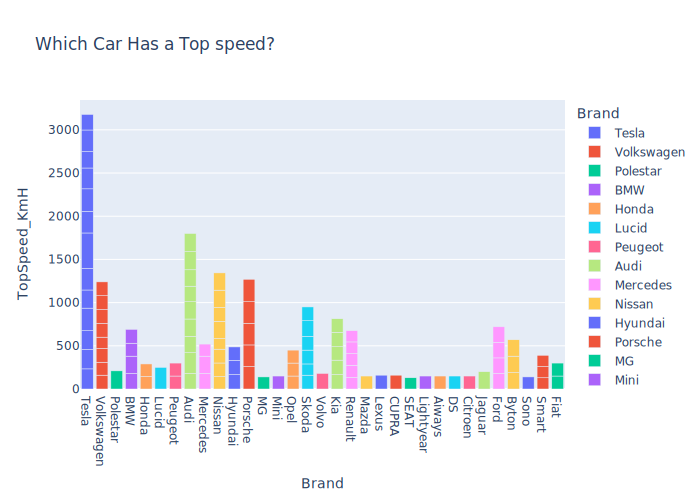

In [ ]:

fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

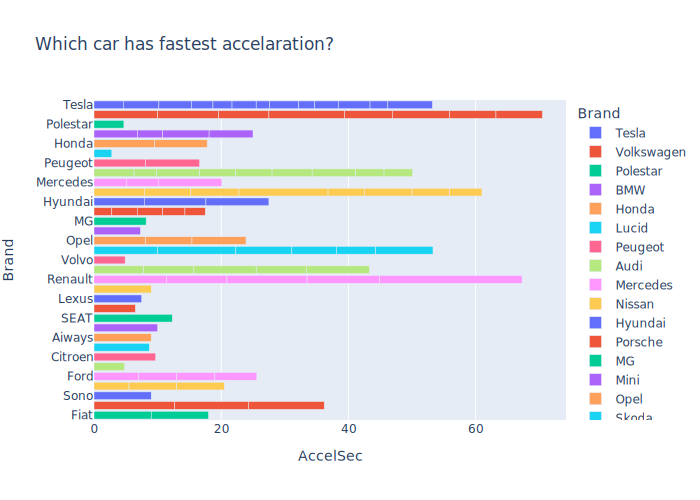

In [ ]:
fig = px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

<Axes: title={'center': 'Car Price'}, xlabel='No.  of Samples', ylabel='Car Price'>

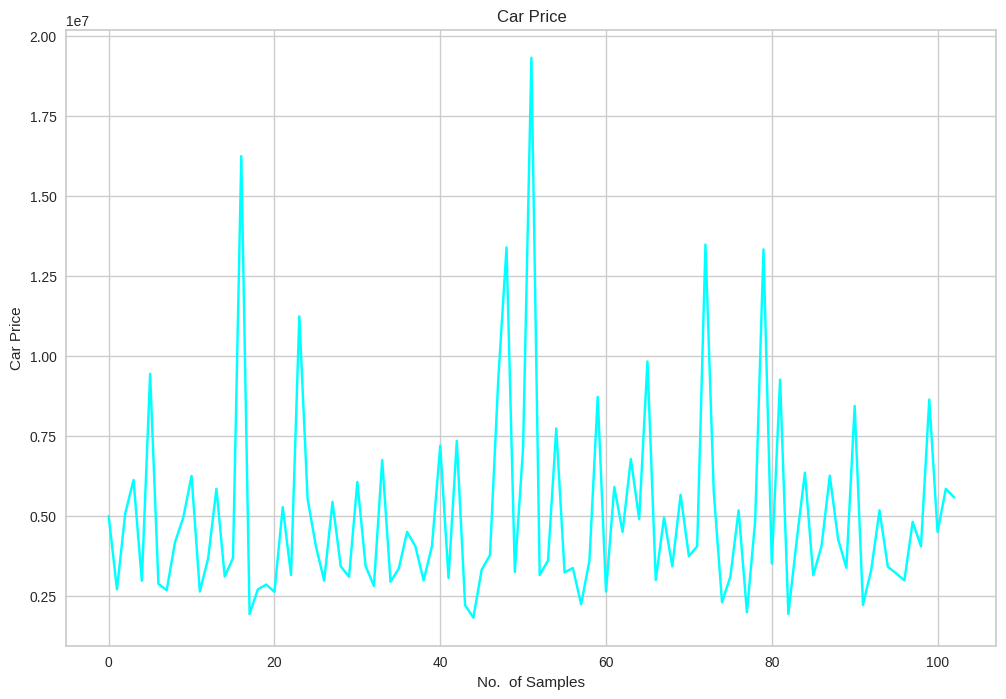

In [ ]:
df['INR'].plot(figsize = (12,8),title='Car Price',xlabel = 'No.  of Samples',ylabel = 'Car Price',color = 'cyan')

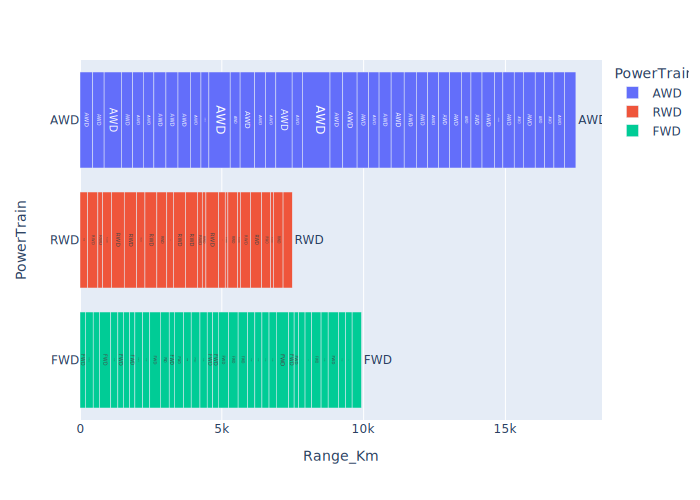

In [ ]:
fig = px.bar(df,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

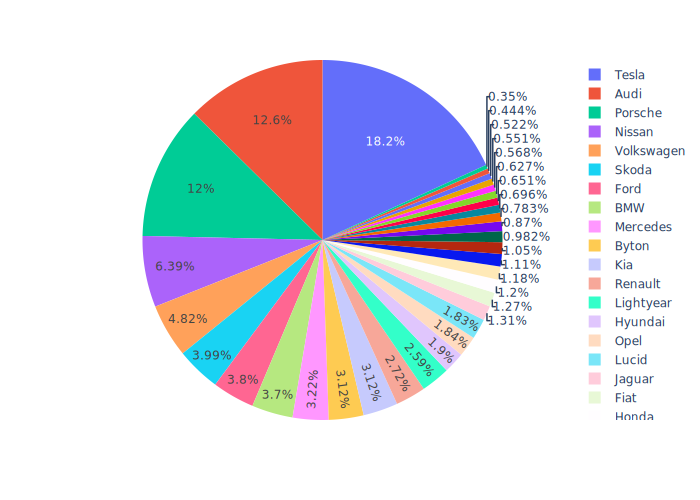

In [ ]:
fig = px.pie(df,names = 'Brand',values = 'INR')
pio.show(fig)

In [ ]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')

In [ ]:
fig = px.scatter_3d(df,x = 'Brand',y = 'AccelSec',z = 'INR',color = 'Brand')

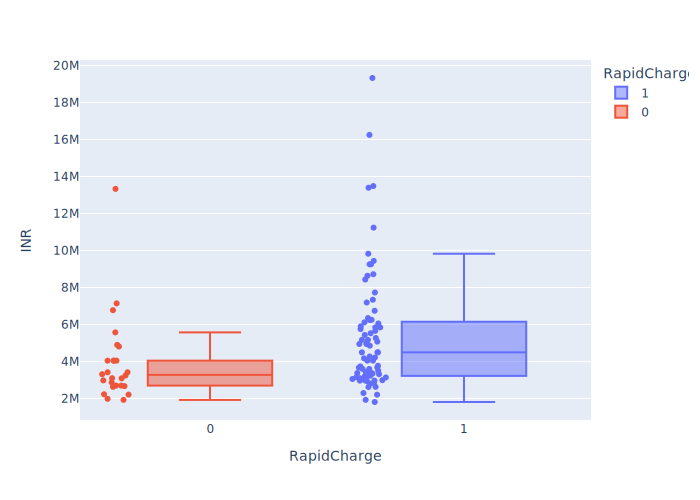

In [ ]:
fig = px.box(df,x='RapidCharge',y = 'INR',color = 'RapidCharge',points='all')
pio.show(fig)

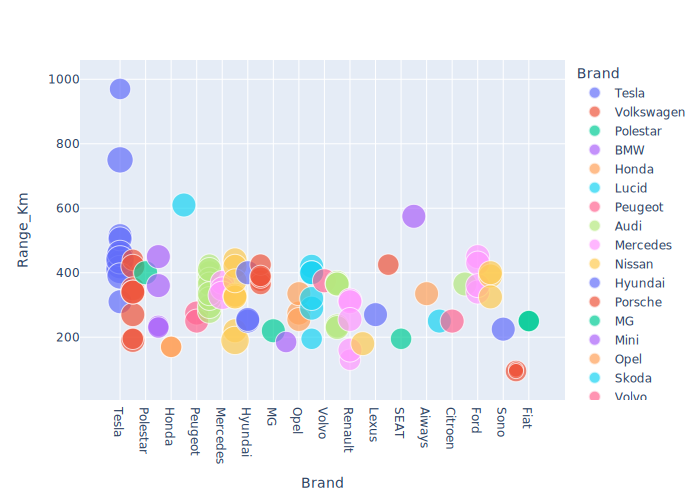

In [ ]:
fig = px.scatter(df,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','INR'])
pio.show(fig)

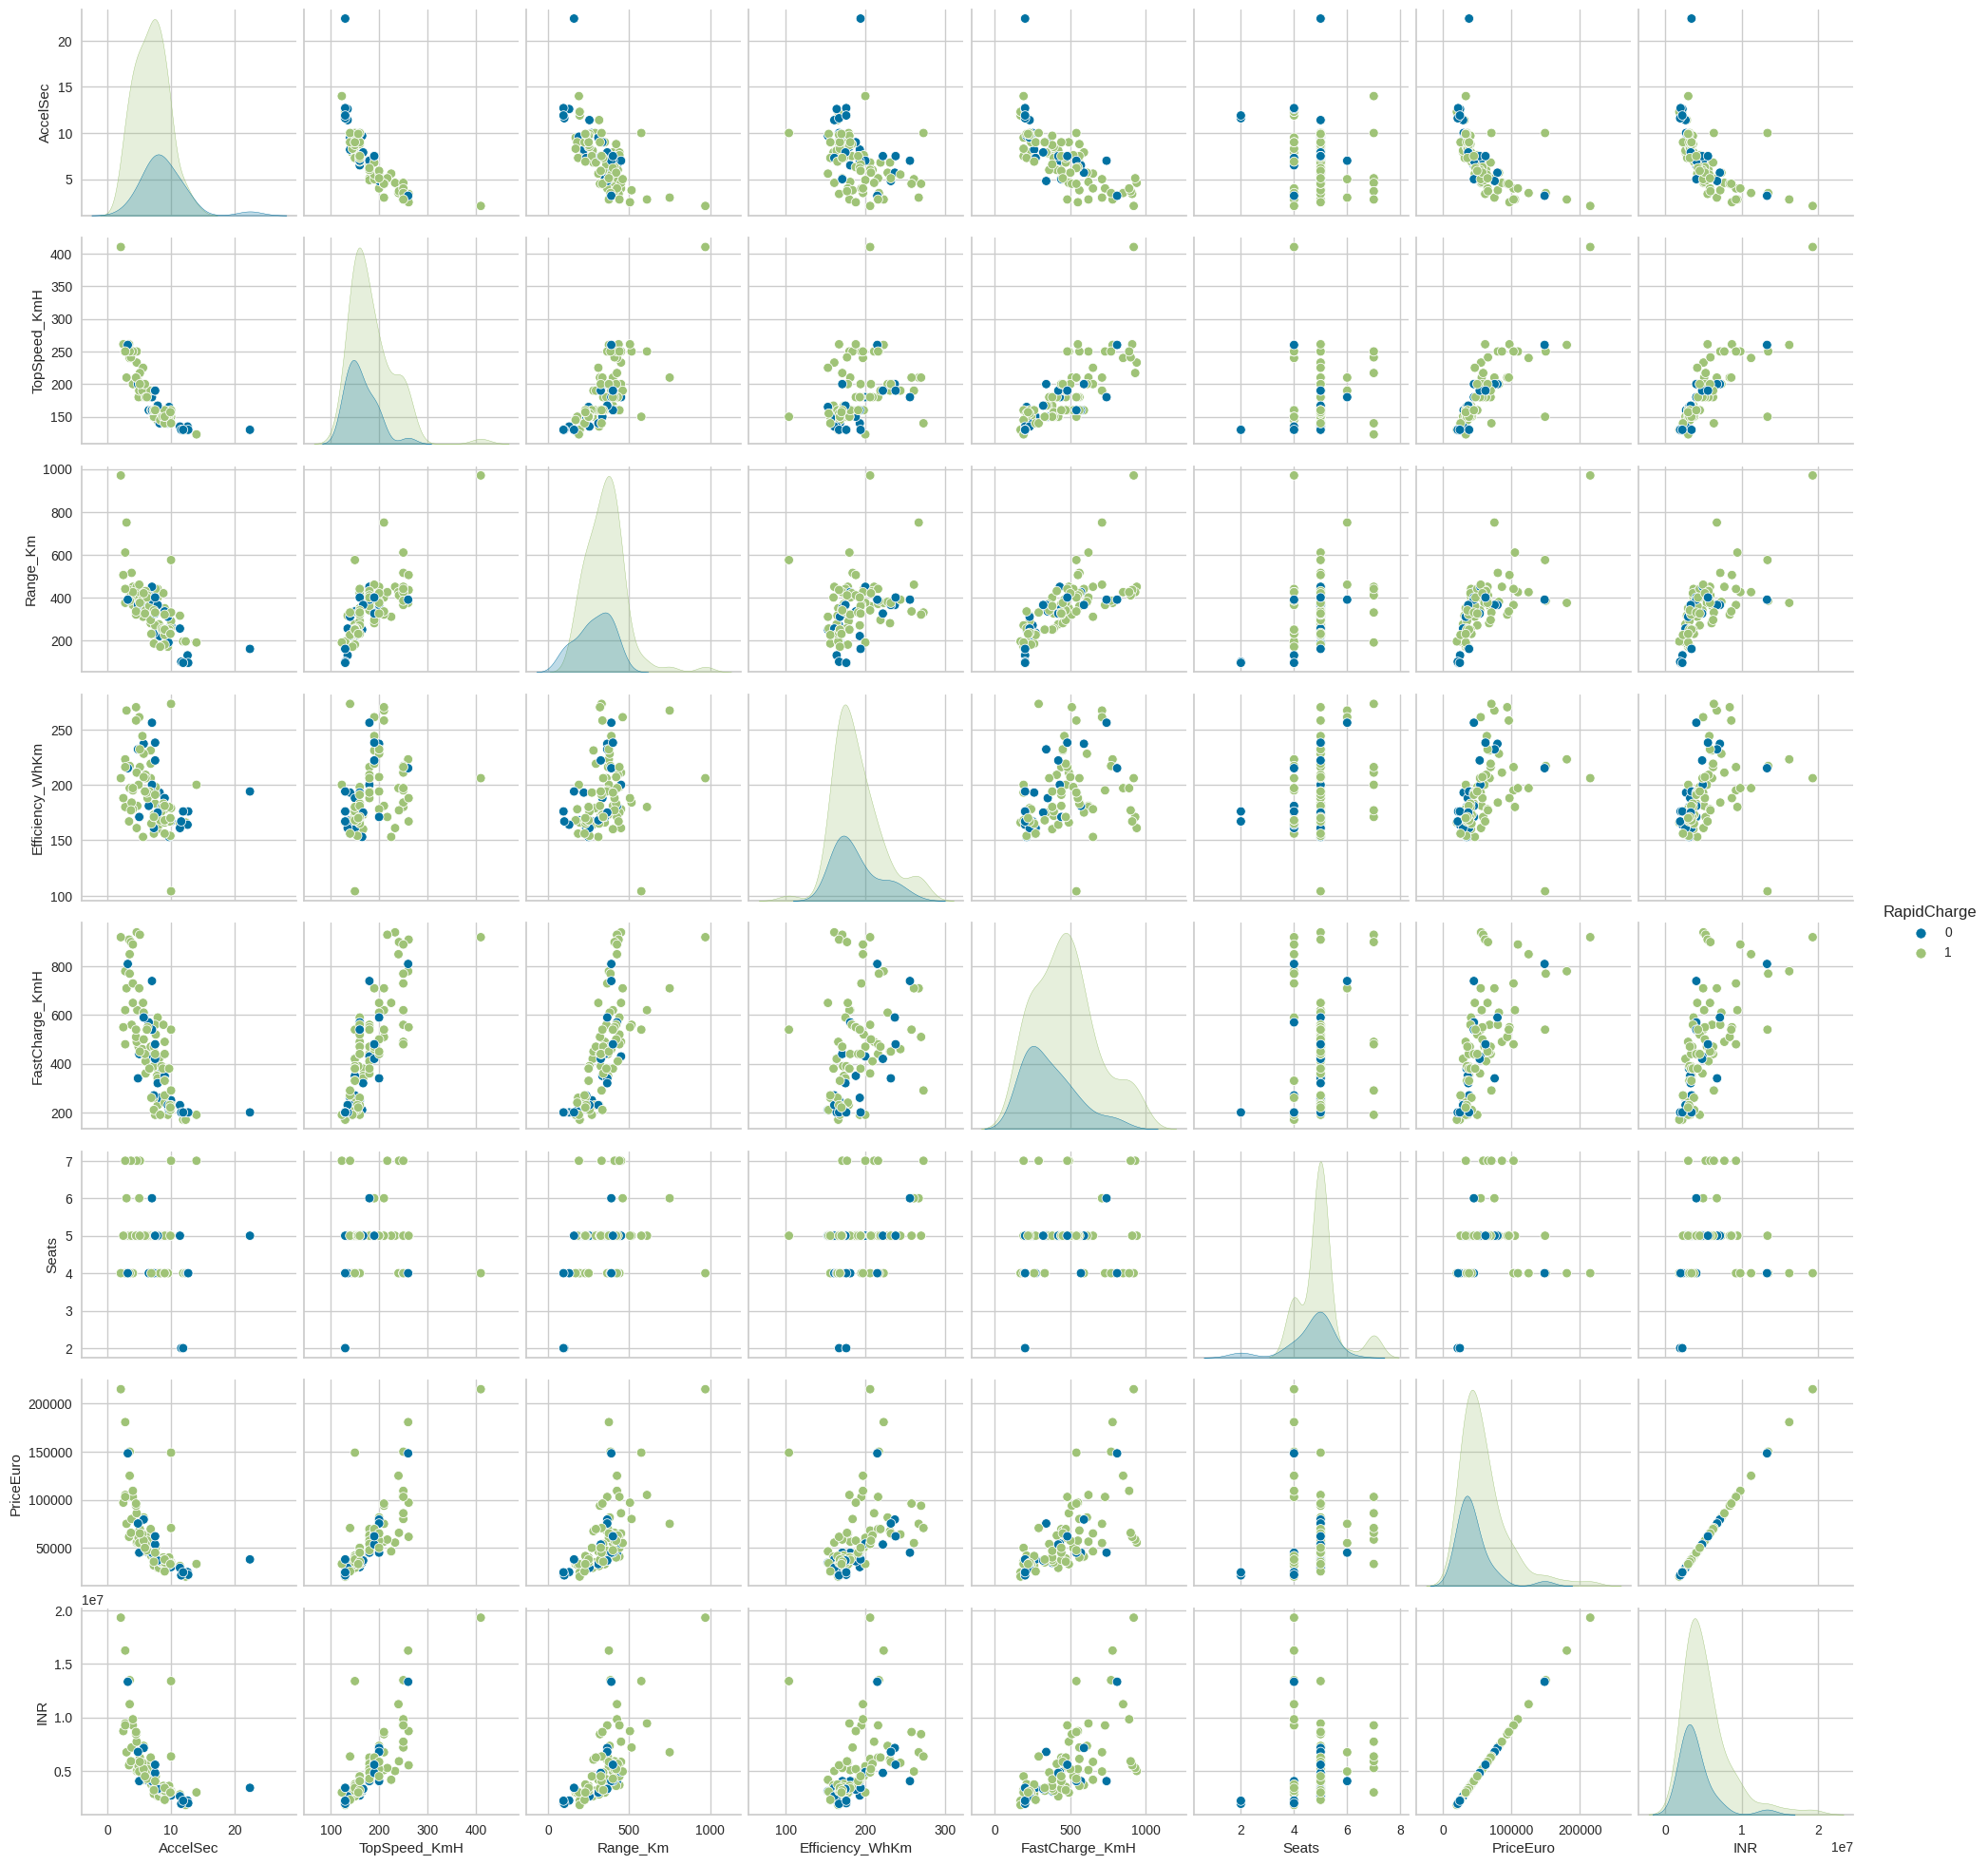

In [ ]:
sns.pairplot(df,hue='RapidCharge')

<ipython-input-29-9279af5eec59>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

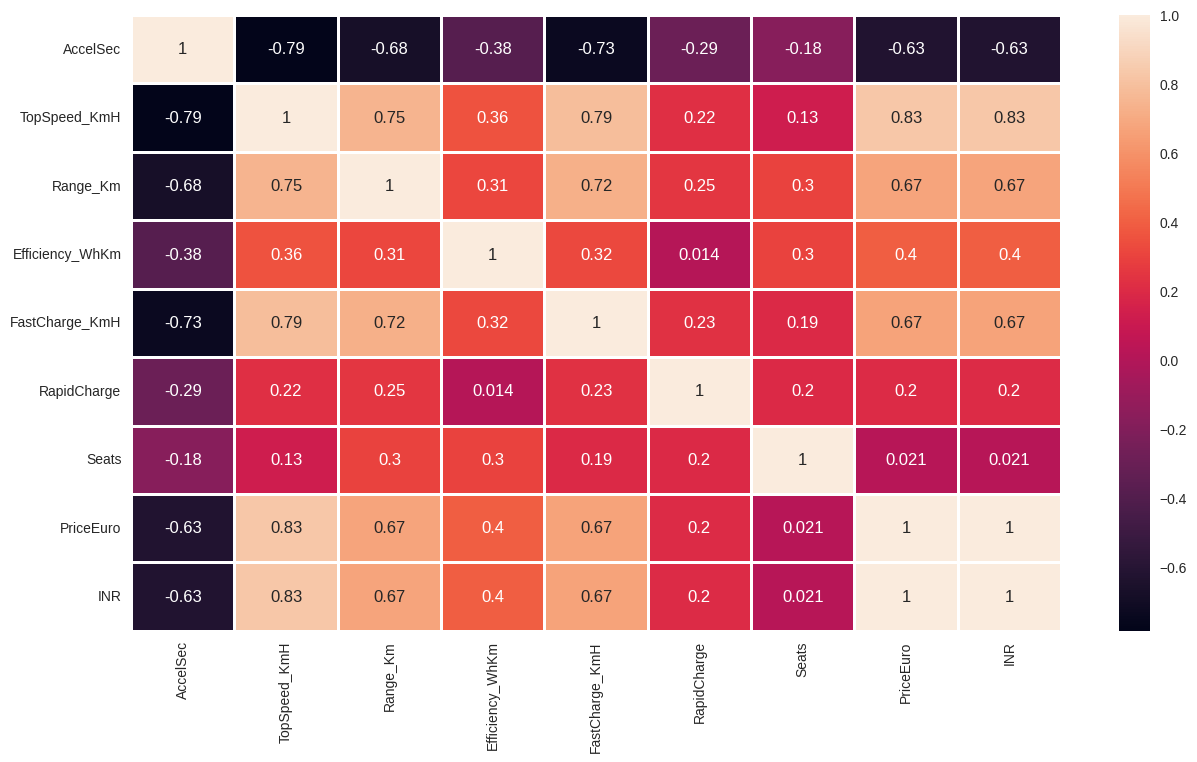

In [ ]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

In [ ]:
a=np.arange(1,104)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

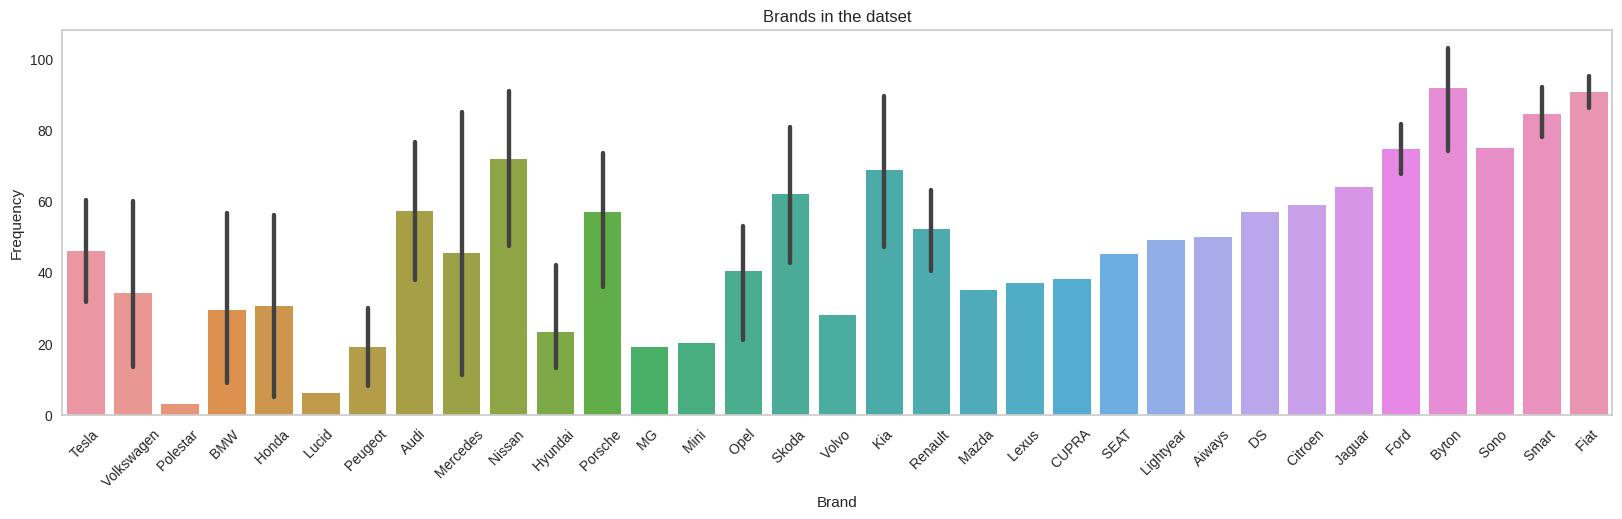

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the dataset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Byton , Fiat and smart are the prominent brands and Polestar being the least

##Top Speeds acheived by the cars of a brand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

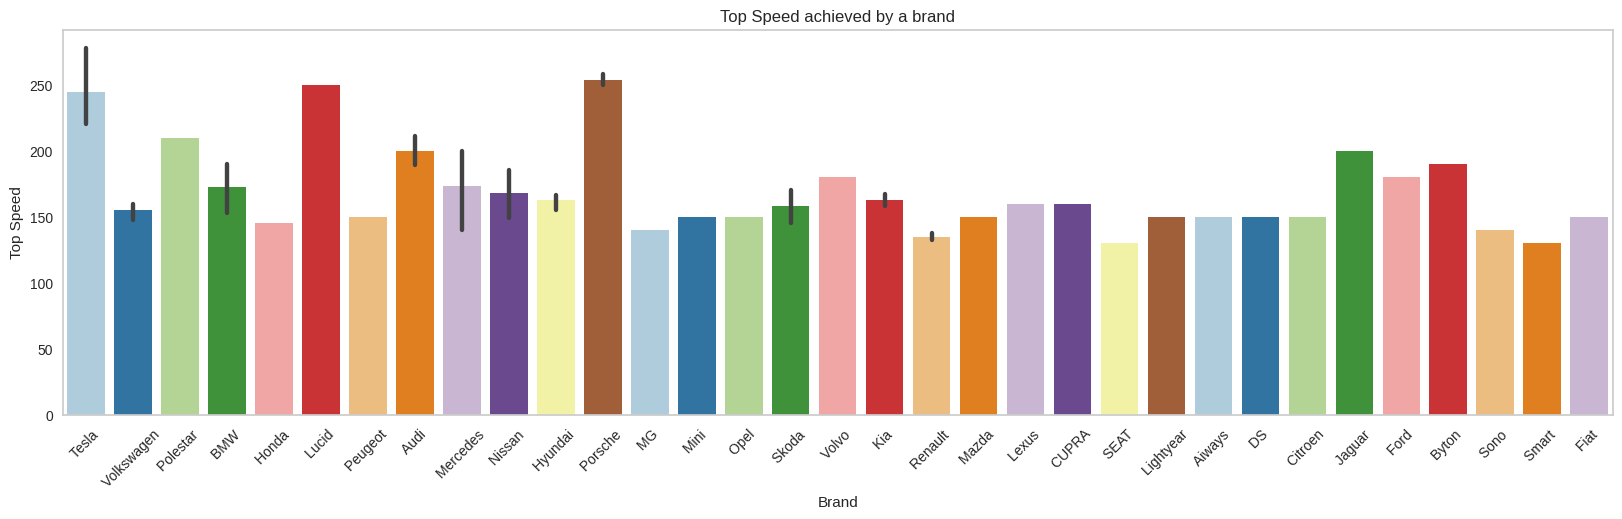

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest

##Range acheived by a car

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

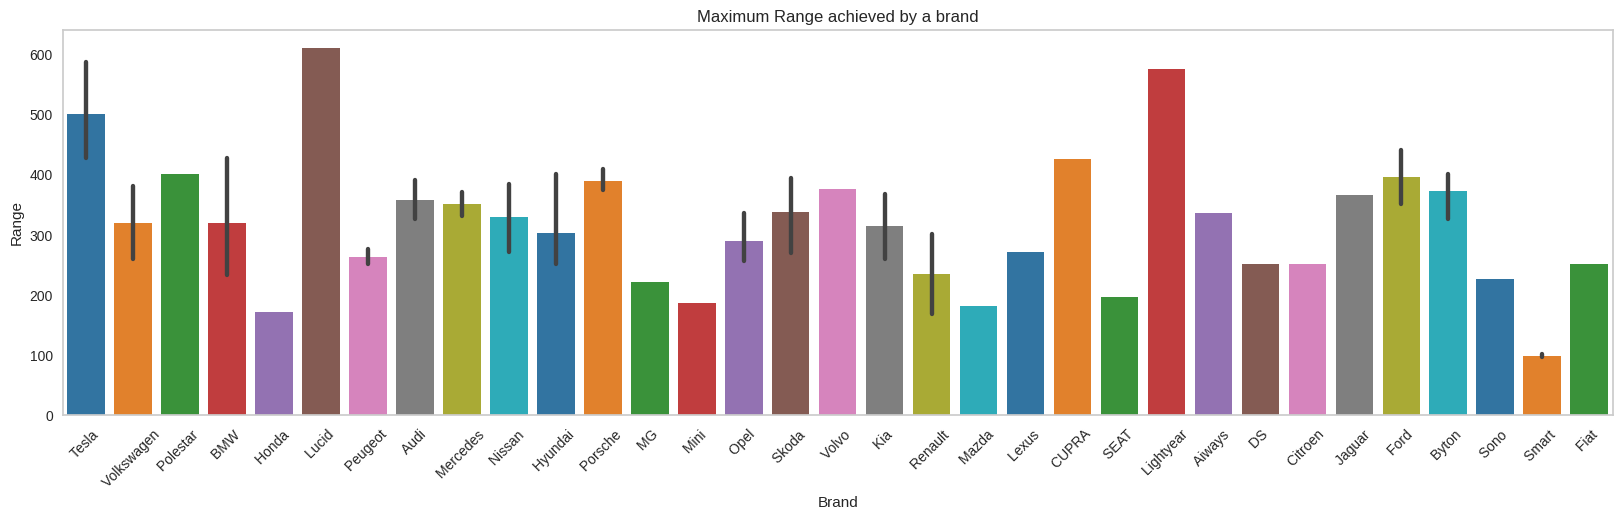

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

Lucid, Lightyear, and Tesla have the highest range and Smart has the lowest range

##Car Efficiency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

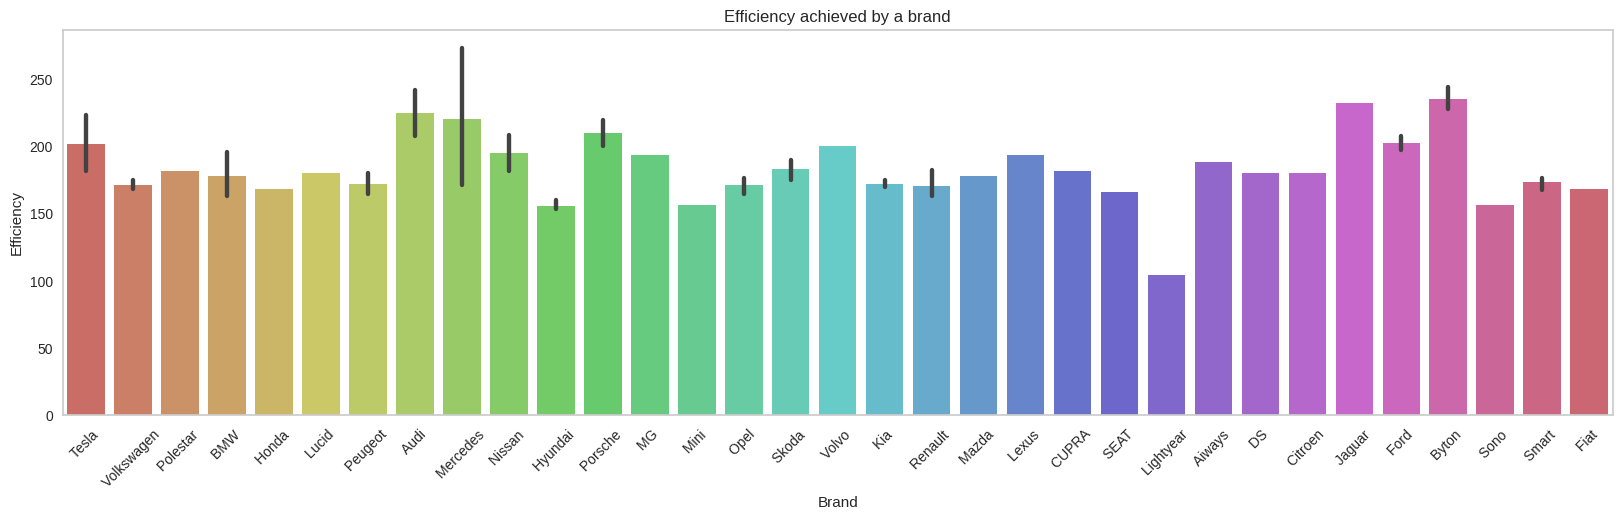

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

Byton, Jaguar and Audi are the most efficient and Lightyear has the least

##Number of seats in each car

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

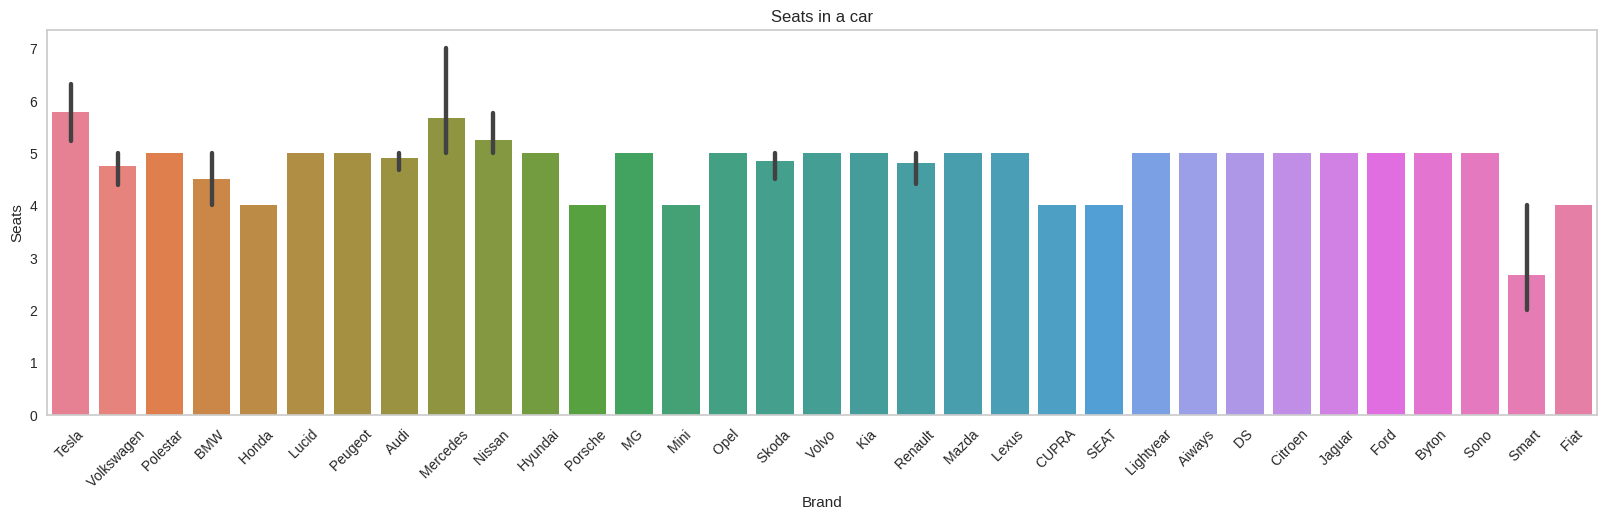

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Mercedes, Tesla and Nissan have the highest number of seats and Smart has the lowest

##Price of cars(INR)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

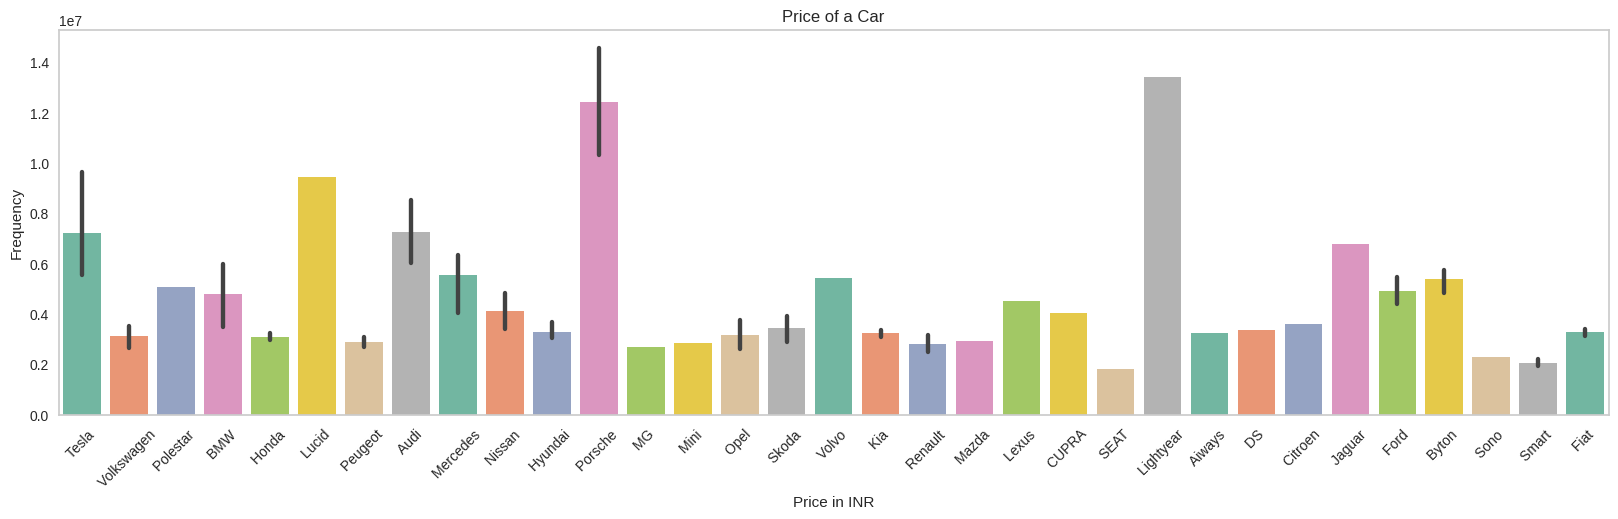

In [ ]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='INR',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Lightyear, Porsche and Lucid are the most expensive and Seat and Smart have the least

##Type of plug used for charging

Text(0.5, 1.0, 'Plug Type')

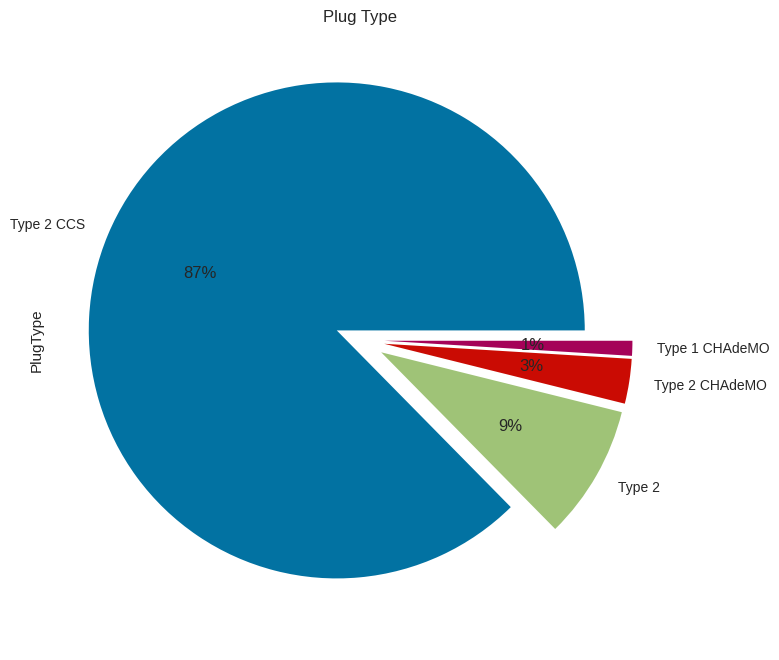

In [ ]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Most companies use Type 2 CCS and Type 1 CHADeMo is least used

##Cars and their body style

Text(0.5, 1.0, 'Body Style')

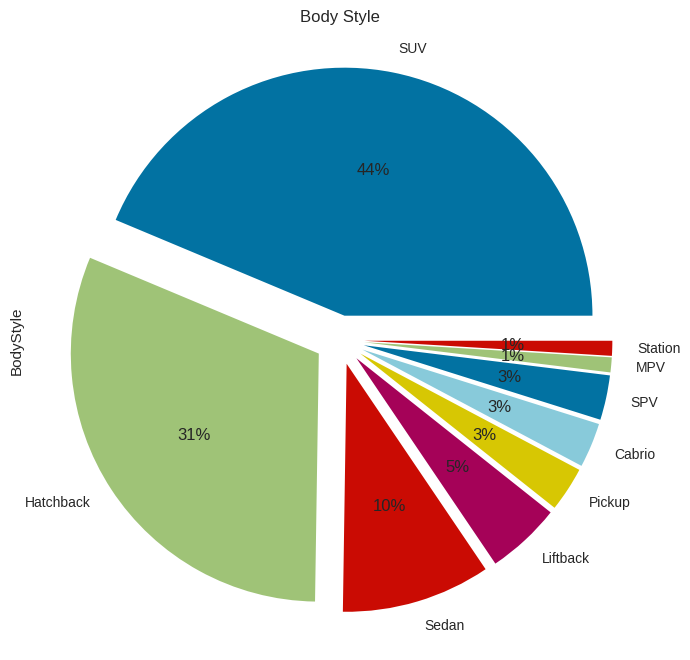

In [ ]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Most cars are either SUV or Hatchback

##Segments of Cars

Text(0.5, 1.0, 'Segment')

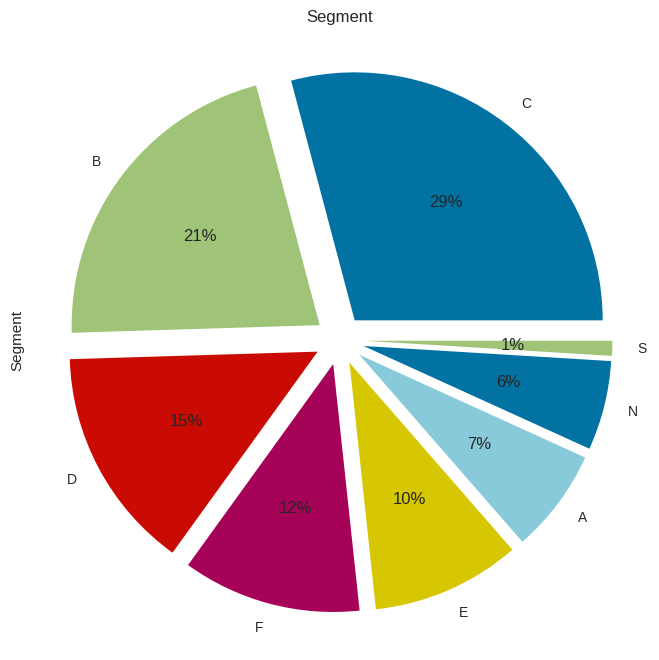

In [ ]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Most cars are either B or C type

##Number of Seats

Text(0.5, 1.0, 'Seats')

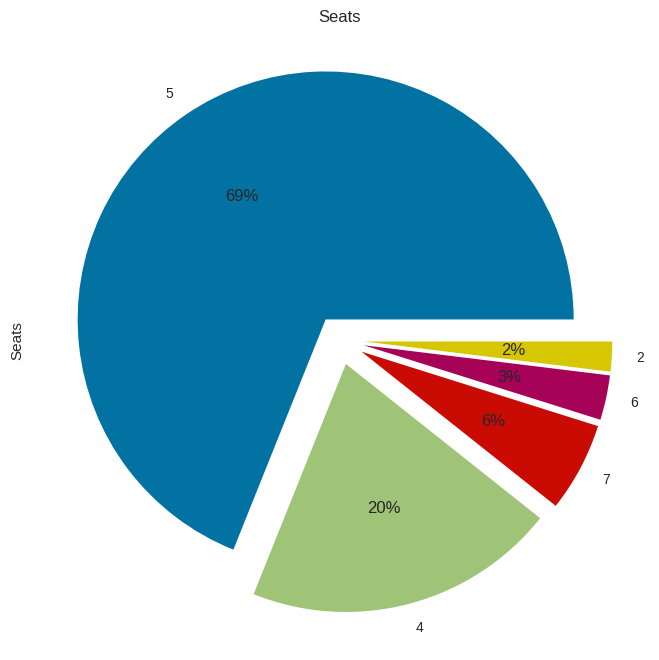

In [ ]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Majority of cars are 5 seater

In [ ]:
df3= df[["TopSpeed_KmH", "INR"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "INR"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

TopSpeed_KmH
Range_Km              
95                   2
100                  1
130                  1
160                  1
170                  2

In [ ]:
df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)

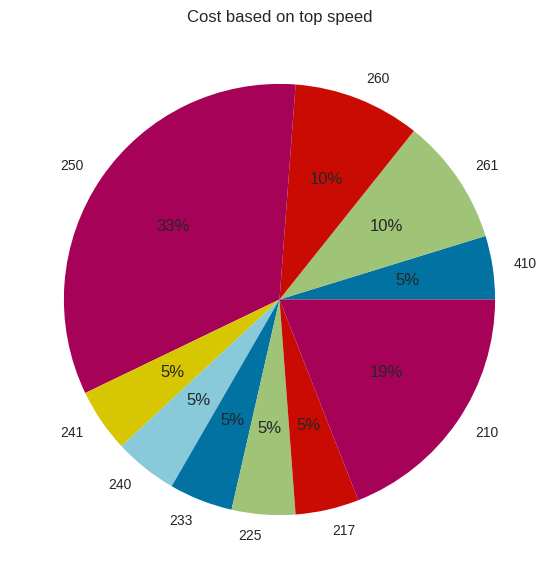

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["INR"],labels=df3.index,autopct='%1.0f%%')
plt.show()

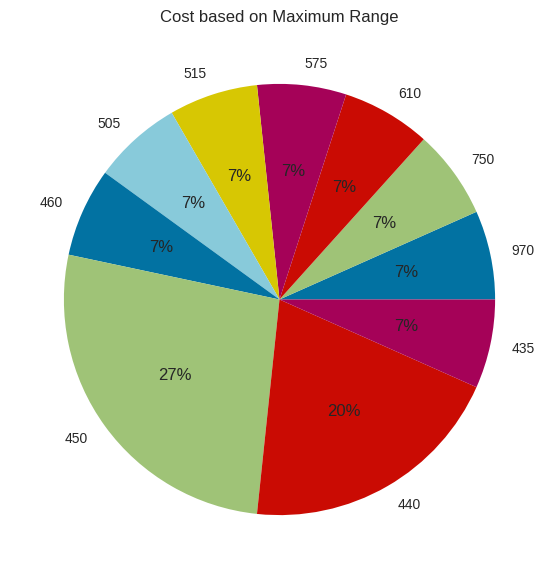

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["INR"],labels=df4.index,autopct='%1.0f%%')
plt.show()

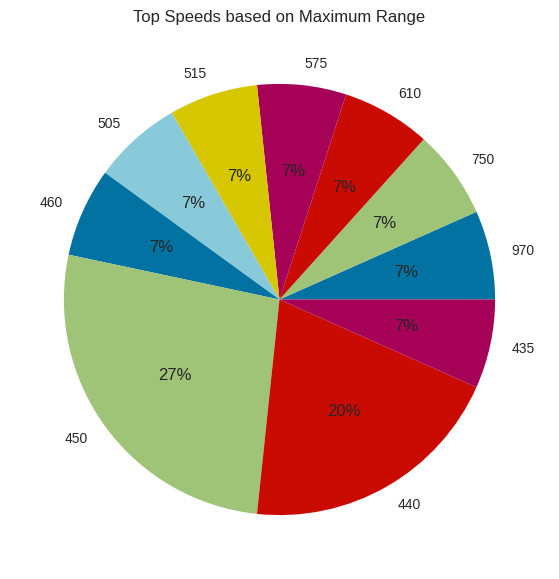

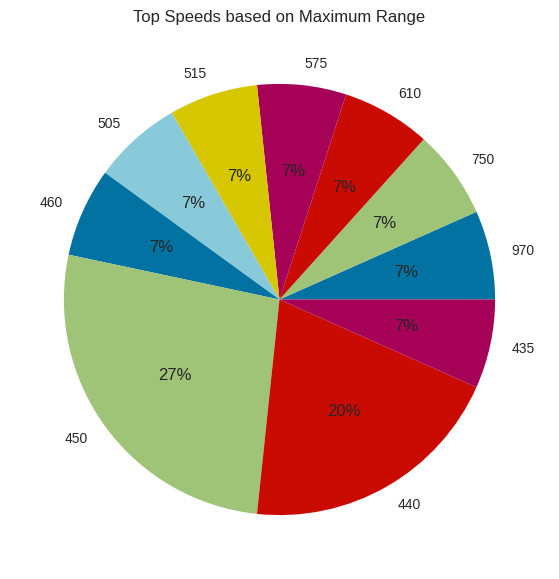

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

##Regression Model

In [ ]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['INR']

In [ ]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

##Model Summary

In [ ]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    INR   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.36
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.57e-24
Time:                        16:49:32   Log-Likelihood:                -1618.4
No. Observations:                 103   AIC:                             3251.
Df Residuals:                      96   BIC:                             3269.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.267e+06   2.14e+06     -4.324      0.000   -1.35e+07   -5.01e+06
AccelSec         1.576e+05   9.43e+04      1.672      0.098   -2.95e+04    3.45e+05
Range_Km         3262.6404   2033.876      1.604      0.112    -774.572    7299.853
TopSpeed_KmH     5.229e+04   7204.625      7.257      0.000     3.8e+04    6.66e+04
Efficiency_WhKm  1.058e+04   6319.212      1.674      0.097   -1967.490    2.31e+04
RapidCharge      1.317e+05   4.04e+05      0.326      0.745   -6.71e+05    9.34e+05
PowerTrain       4.706e+05   2.66e+05      1.771      0.080   -5.68e+04    9.98e+05
==============================================================================
Omnibus:                       84.867   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.645
Skew:                           2.644   Prob(JB):                    8.99e-162
Kurtosis:                      15.036   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

##R-squared Value

In [ ]:
r2=(r2_score(y_test,pred))
print(r2*100)

78.77072380232664


Around 78% of the dependent variable has been explained by the independent variables

In [ ]:
y1=df[['RapidCharge']]
x1=df[['INR']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [ ]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

##Confusion Matrix

In [ ]:
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  6],
       [ 0, 15]])

##Clustering

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

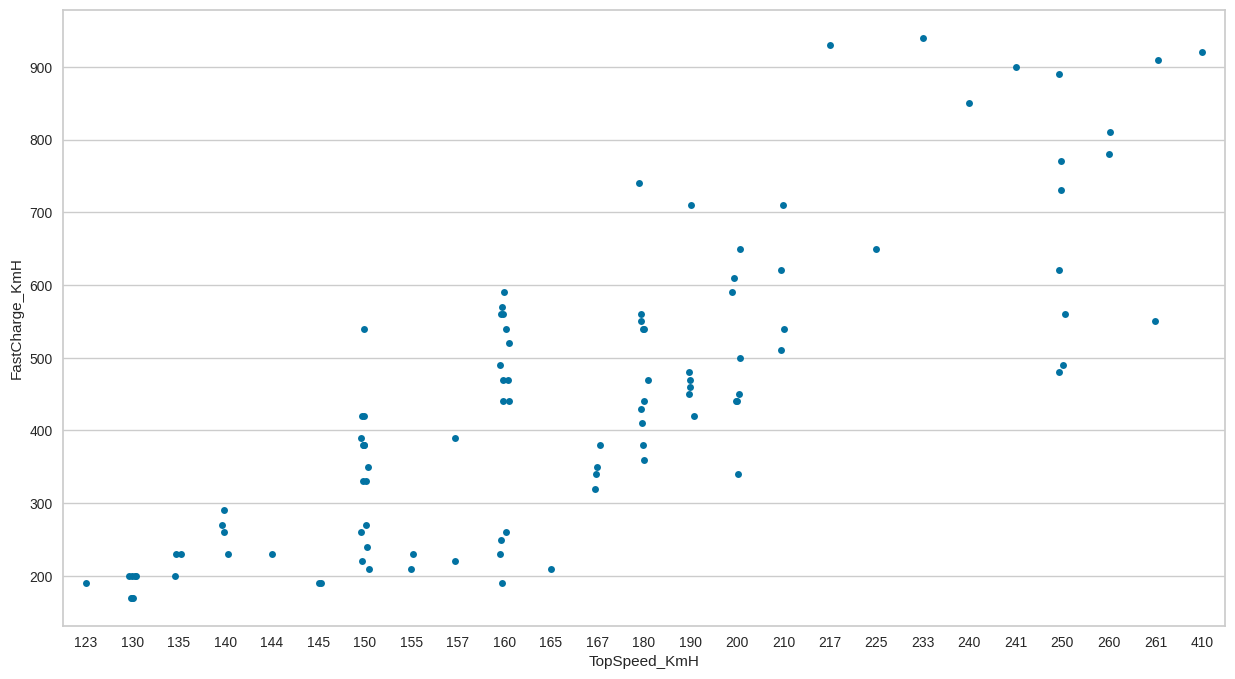

In [ ]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

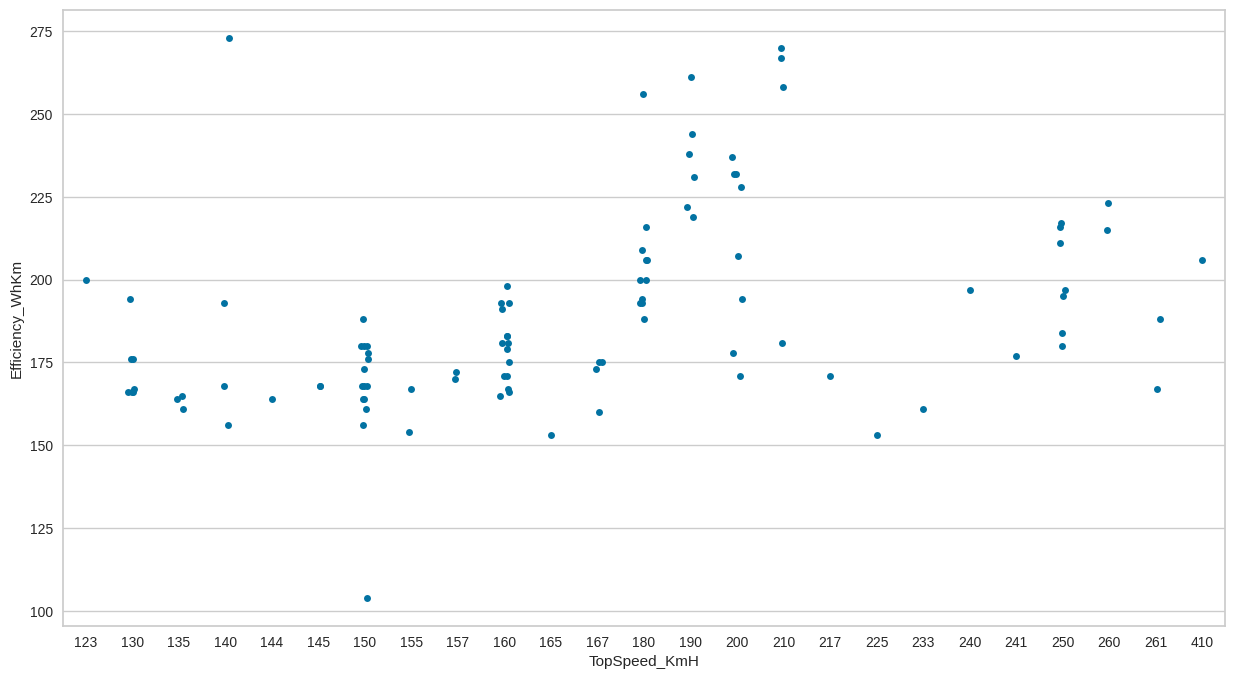

In [ ]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

In [ ]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'INR','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

PC1     PC2     PC3     PC4     Pc5     PC6     PC7     PC8     PC9
0    2.4292 -0.5546 -1.1478 -0.8828  0.8400 -0.9593  0.9989  0.7111 -0.3967
1   -2.3225 -0.3454  0.8965 -1.3055  0.0796  0.2351 -0.2137 -0.5441 -0.1819
2    1.5879  0.0089 -0.6505  0.0410  0.5935 -0.6982  0.0587  0.2488 -0.2028
3    0.2910 -0.0001 -0.3077 -0.5142 -1.6089  0.2916  0.3650 -0.2355  0.2617
4   -2.6027 -0.6265 -0.8881  0.5853 -0.8021  0.0274 -0.0850 -0.5078 -0.0499
..      ...     ...     ...     ...     ...     ...     ...     ...     ...
98  -0.2972  0.4467 -0.4636  0.1025 -0.3460 -0.1005  0.0311  0.2023  0.1454
99   2.3350  0.6307  0.9859  1.5601 -0.8173 -0.1219  0.1641 -0.2557  0.1410
100  0.7806  0.4268 -0.2986  0.7086  0.4817 -0.5401 -0.1398 -0.0487 -0.3675
101  1.5409  0.6988  0.4224  1.0949 -0.2981 -0.3080 -0.3632  0.1273 -0.1904
102  0.9151  0.2615  2.4106  0.1880  0.3408  0.0156 -0.1719  0.5676 -0.2008

[103 rows x 9 columns]

In [ ]:
df_9=data2.iloc[:,:9]
df_9.head(3)

PC1     PC2     PC3     PC4    Pc5     PC6     PC7     PC8     PC9
0  2.4292 -0.5546 -1.1478 -0.8828 0.8400 -0.9593  0.9989  0.7111 -0.3967
1 -2.3225 -0.3454  0.8965 -1.3055 0.0796  0.2351 -0.2137 -0.5441 -0.1819
2  1.5879  0.0089 -0.6505  0.0410 0.5935 -0.6982  0.0587  0.2488 -0.2028

In [ ]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8  \
variable                                                                   
PC1      -0.3964  0.0862  0.0648  0.0583  0.1445  0.6769  0.4125  0.2707   
PC2       0.4220 -0.2168  0.0023 -0.0685  0.0382  0.0452  0.0376 -0.4138   
PC3       0.2383  0.3309  0.5718  0.3805 -0.5751  0.0249  0.0047  0.1442   
PC4       0.3945 -0.1384 -0.0477 -0.2965 -0.0924 -0.2379  0.7282  0.3584   
Pc5       0.1572  0.2699 -0.8033  0.3953 -0.2926  0.0870  0.0539  0.0408   
PC6       0.3895 -0.0247 -0.0763 -0.3871 -0.0328  0.3645 -0.5208  0.5342   
PC7       0.1404  0.8013  0.0195 -0.4290  0.1653  0.0867  0.0984 -0.3208   
PC8       0.3898 -0.2623  0.0738  0.1799  0.0433  0.5587  0.1180 -0.3821   
PC9       0.3229  0.1805  0.0983  0.4866  0.7228 -0.1499 -0.0191  0.2653   

             PC9  
variable          
PC1      -0.3246  
PC2      -0.7708  
PC3      -0.0990  
PC4       0.1057  
Pc5      -0.0561  
PC6      -0.0380  
PC7       0.0800  
PC8       0.5172  
PC9      -0.0333

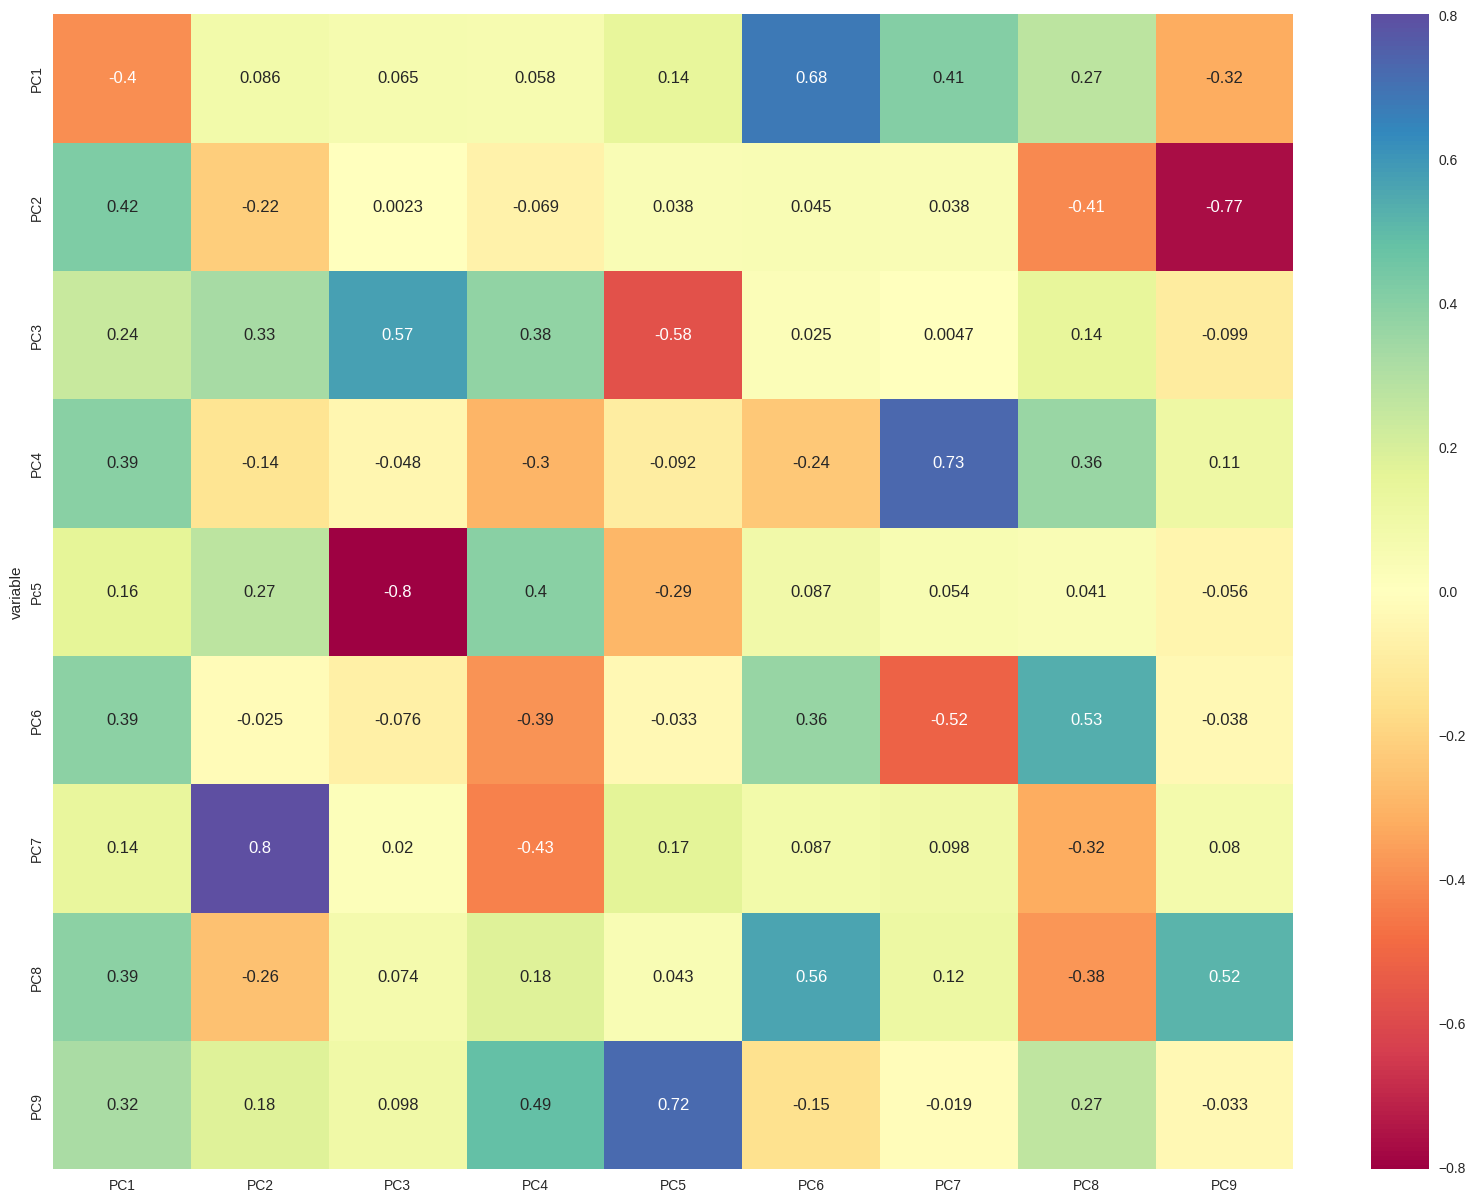

In [ ]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

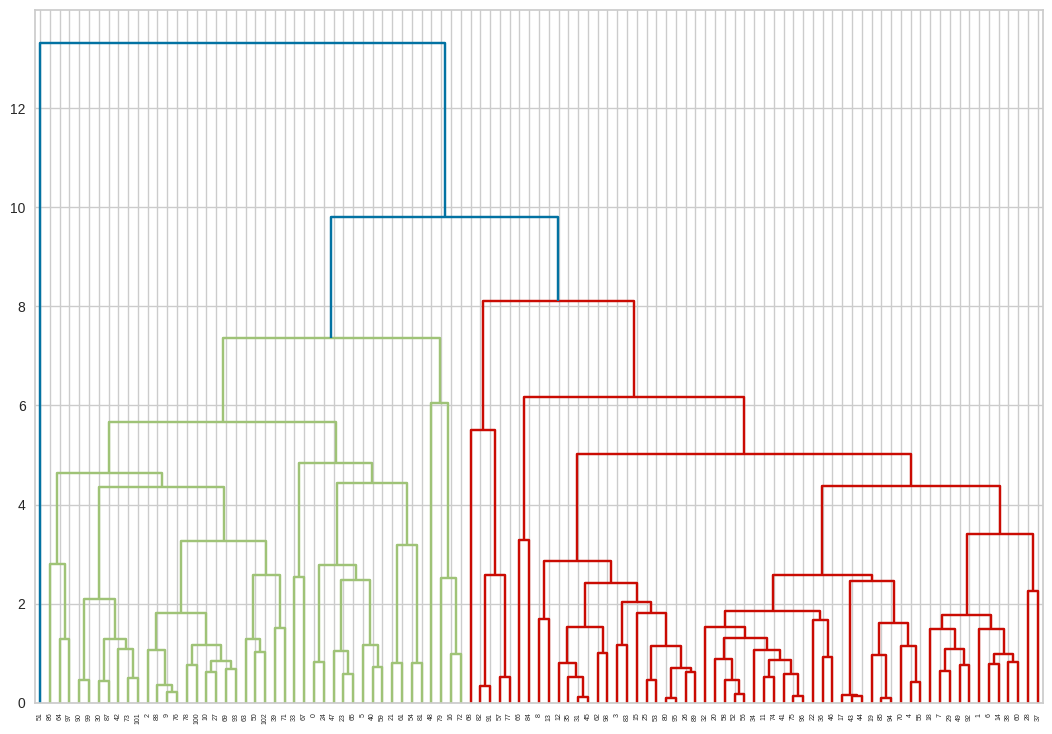

In [ ]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

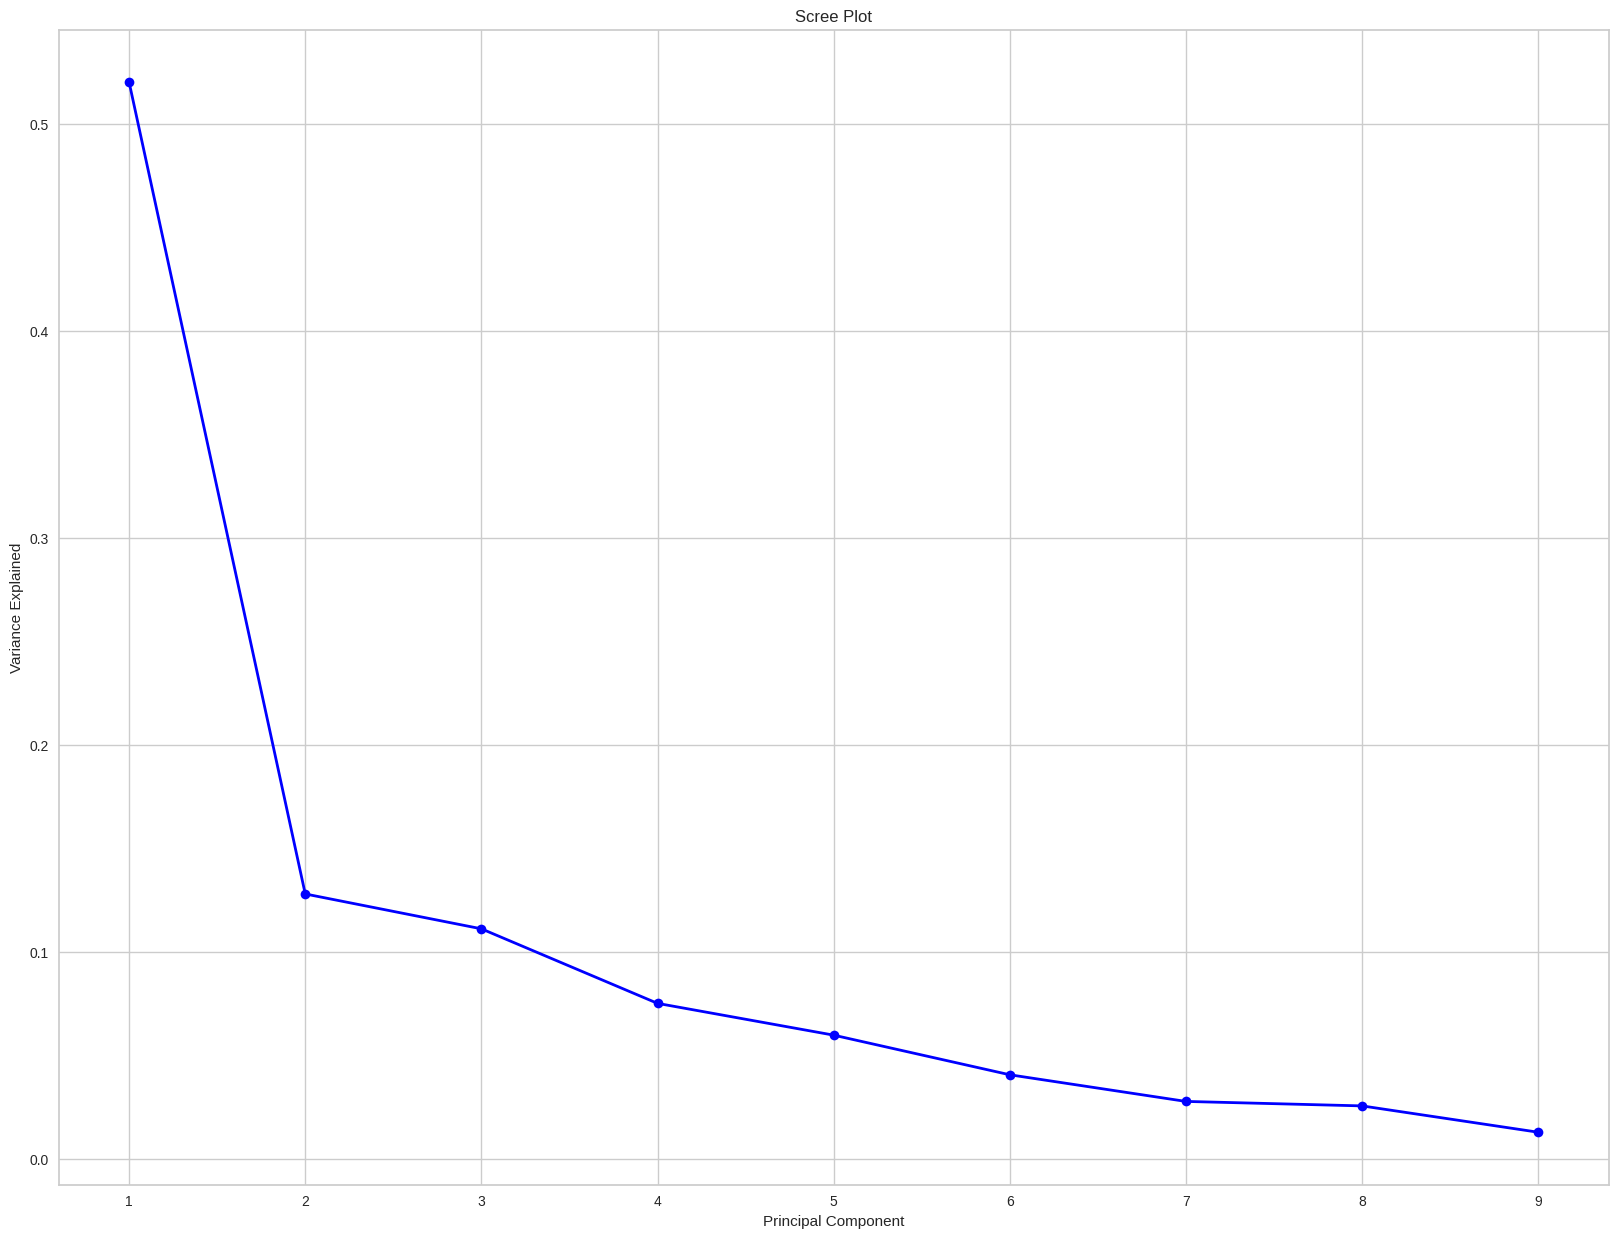

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

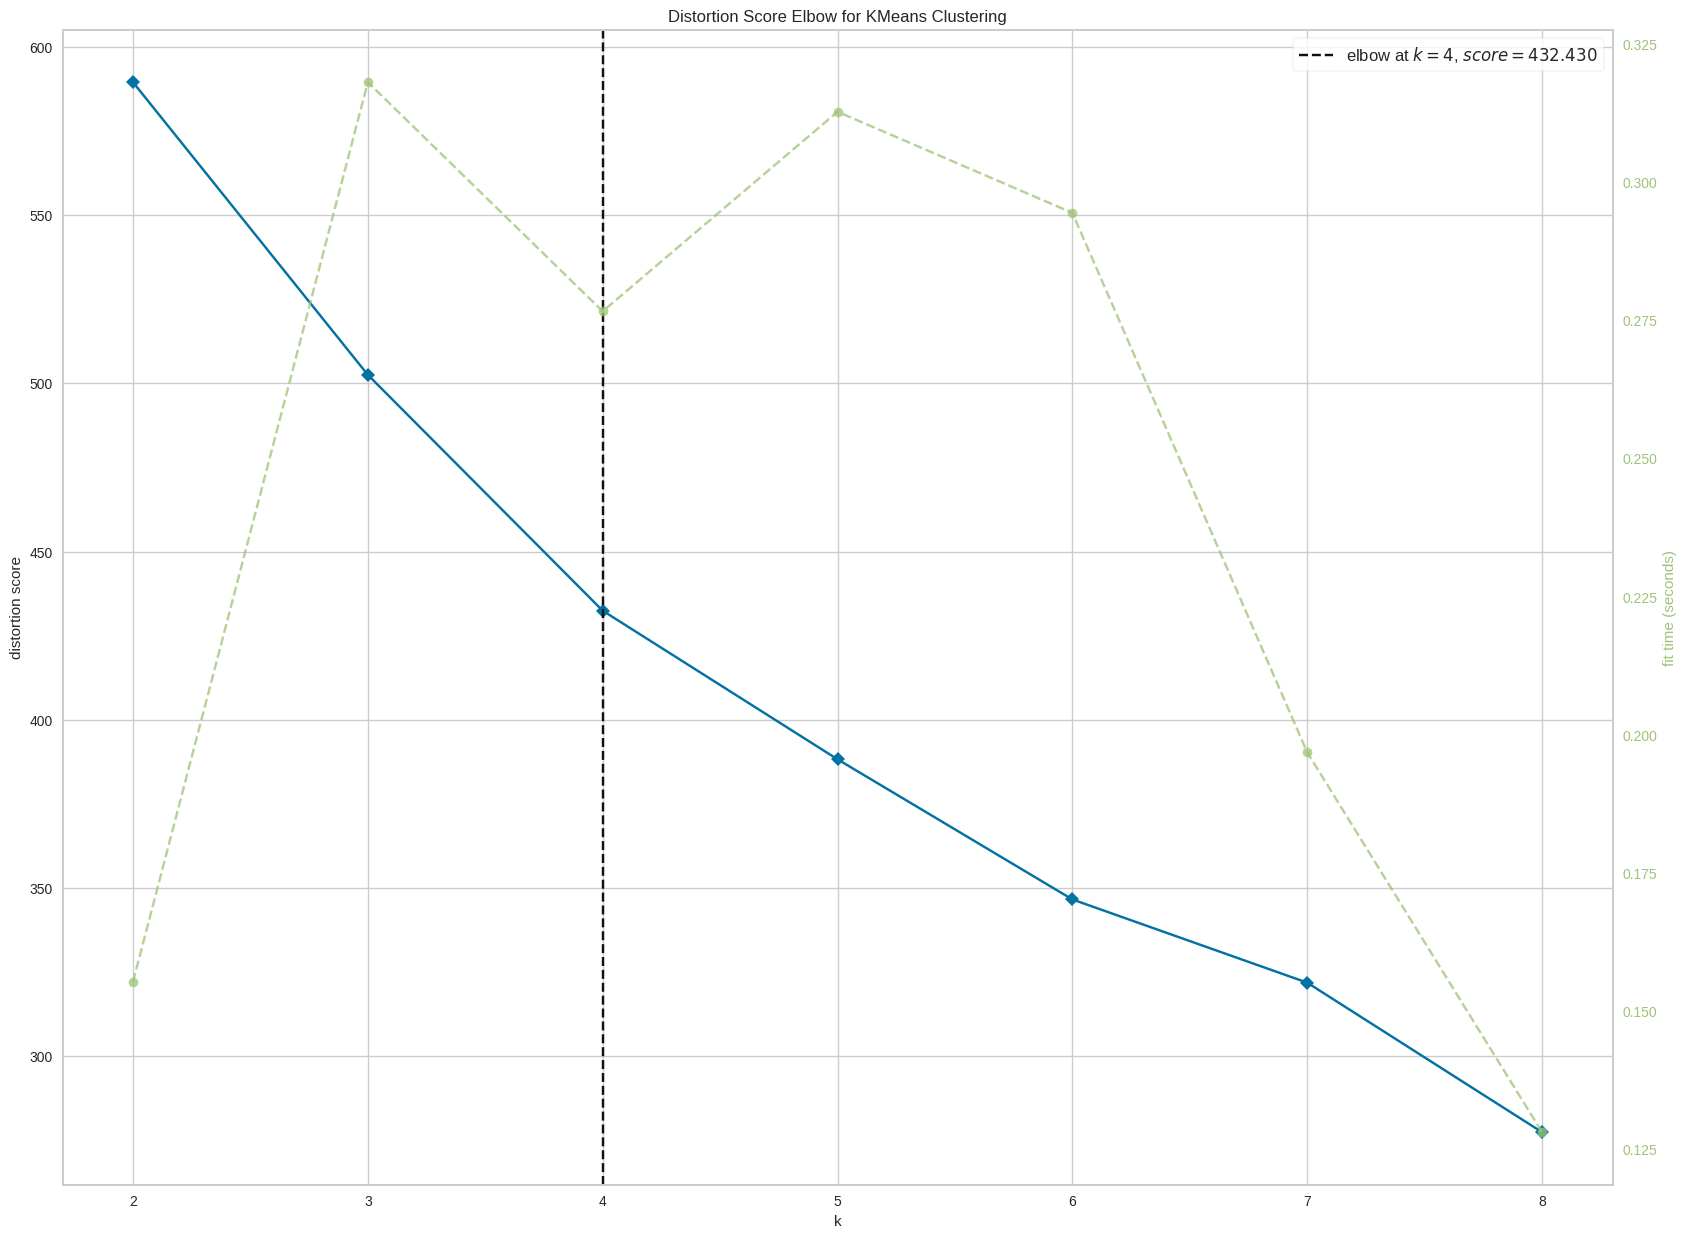

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

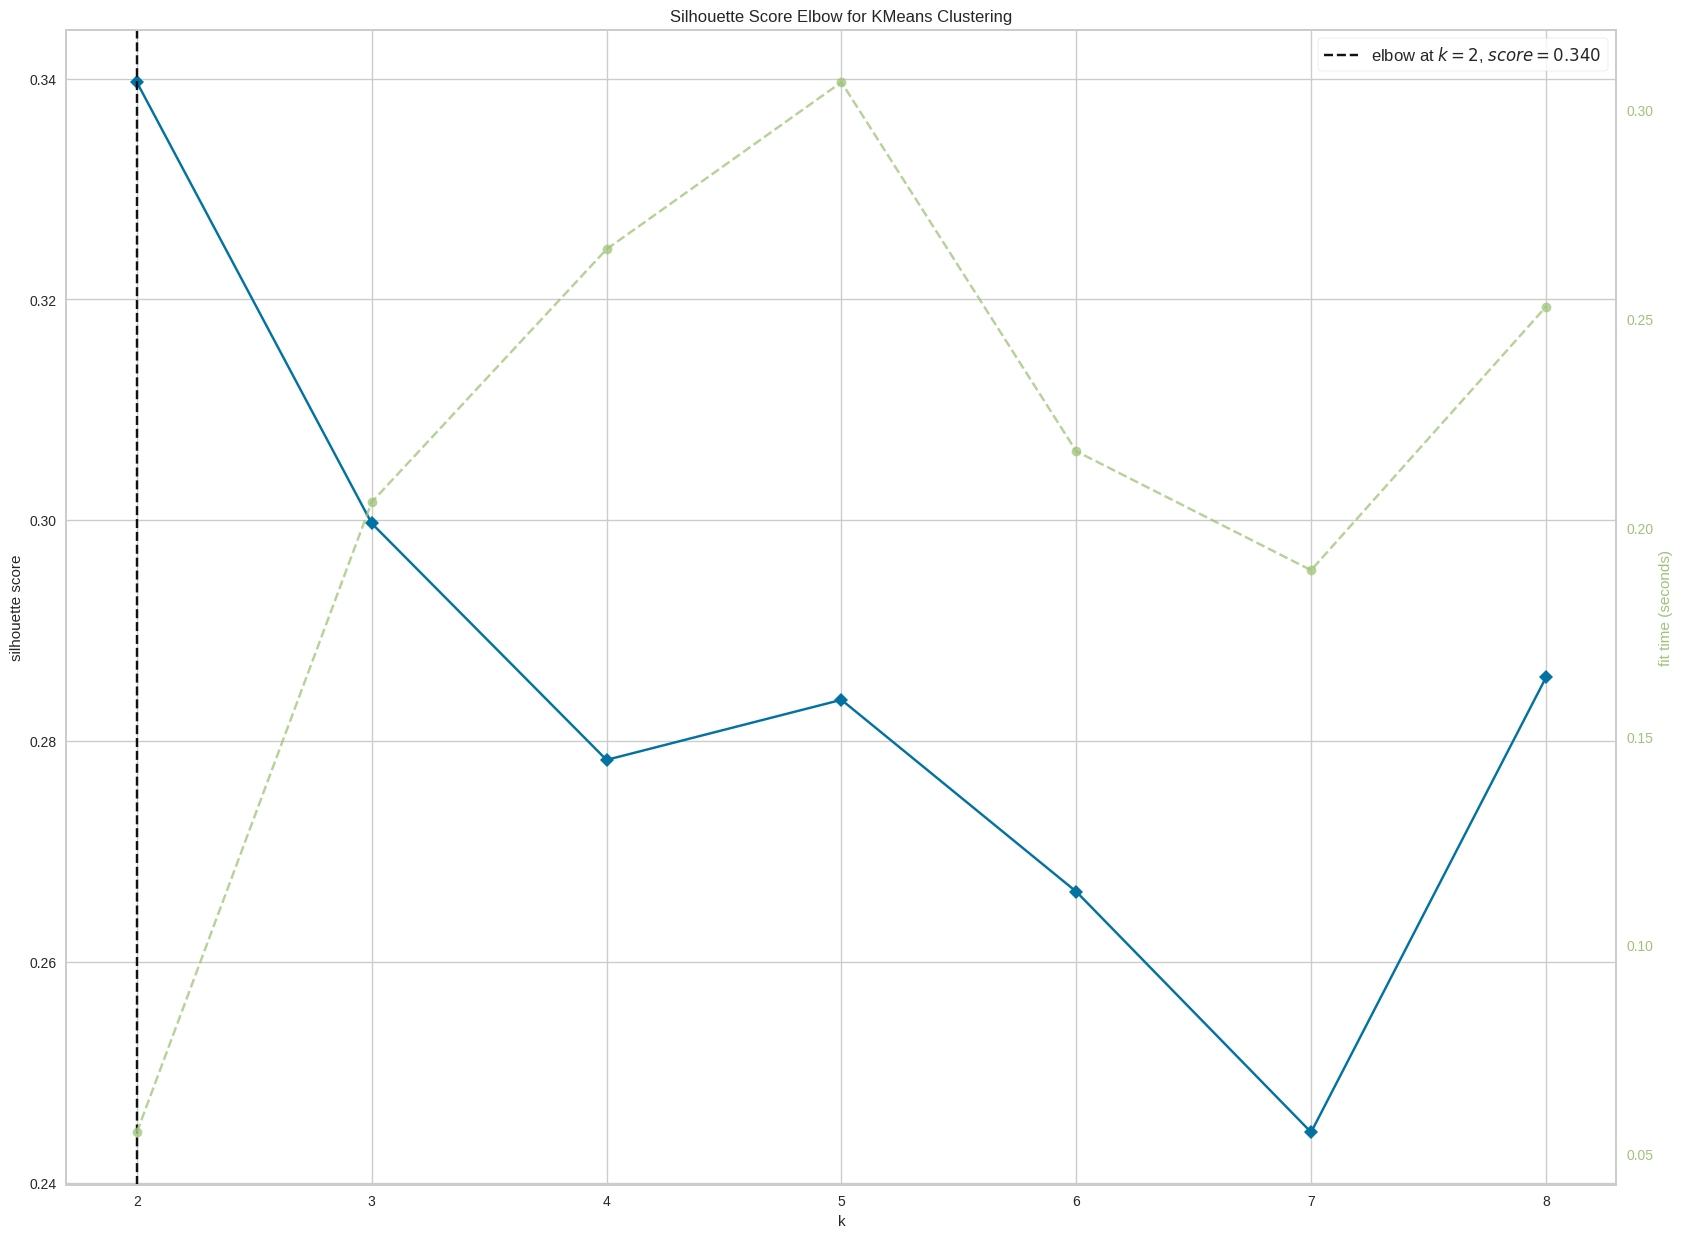

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

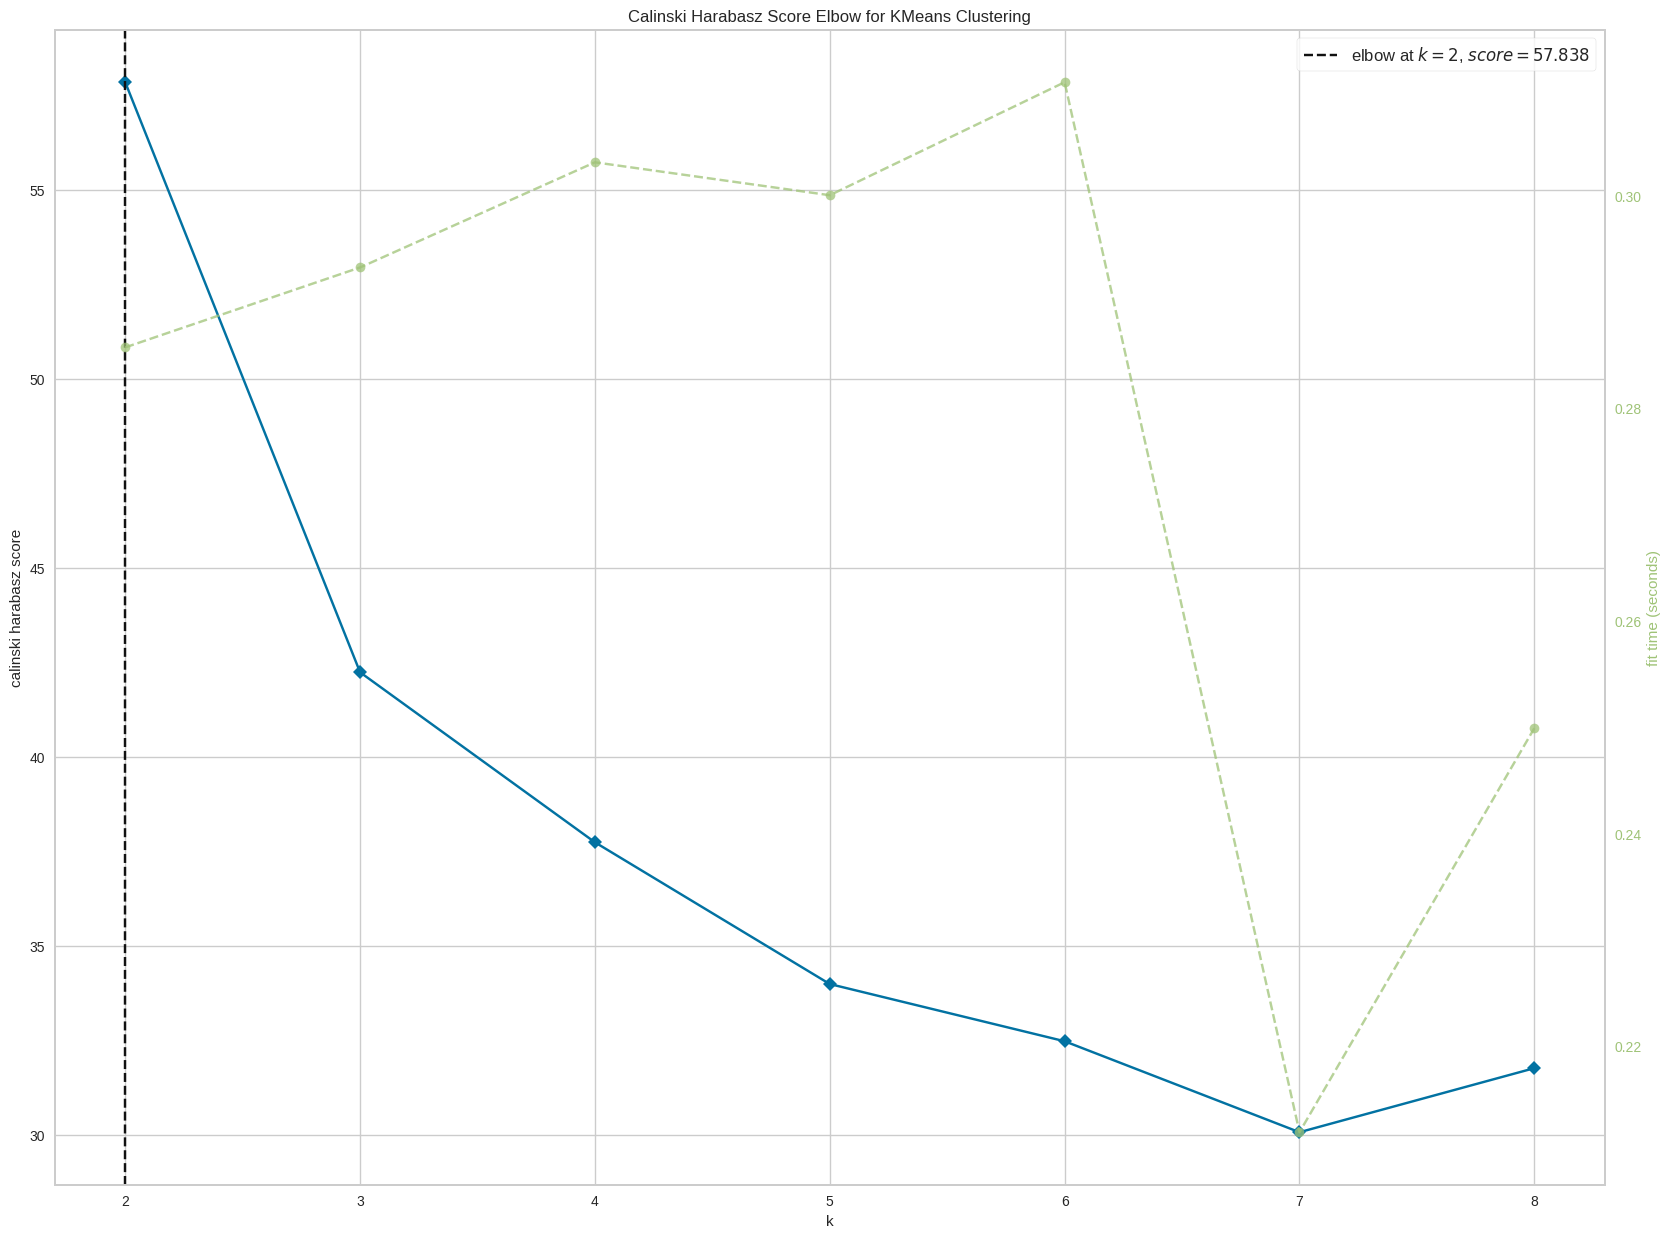

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]
427.887468451736
5
[[ 3.38081 -1.38223 -0.36489  0.10477  0.40601  0.27185  0.242   -0.10662
   0.04313]
 [-1.28035  0.15751 -0.8038   0.03883 -0.26171  0.05765 -0.02518 -0.04843
  -0.00967]
 [ 1.4734   0.75533  0.44439  0.22305  0.00588 -0.20901 -0.0464   0.13708
   0.00747]
 [-2.16662 -0.64972  1.15112 -0.52704  0.2495   0.04766 -0.03575 -0.0585
  -0.02224]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
#To see each cluster size

Counter(kmeans.labels_)

Counter({0: 13, 3: 19, 2: 32, 1: 39})

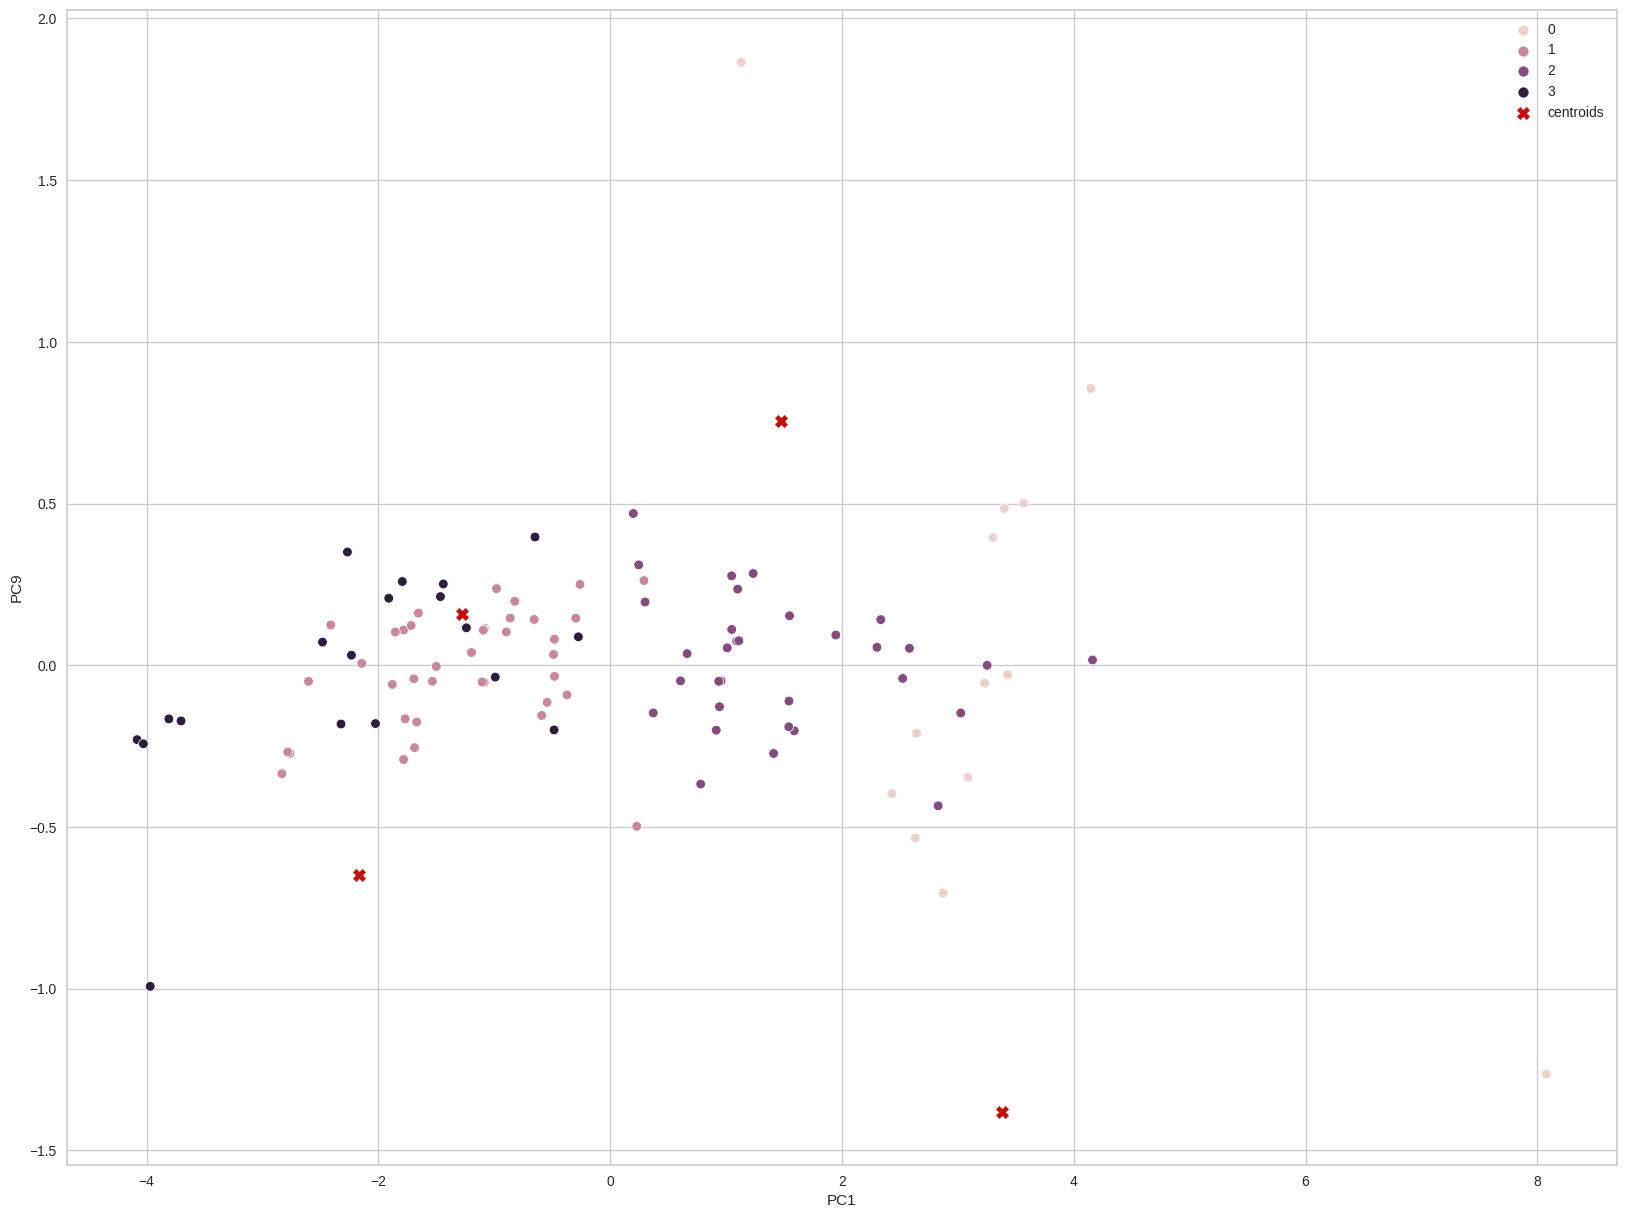

In [ ]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

##Regression for data2

In [ ]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['INR']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [ ]:
print(lm.intercept_)

5016343.292038835


In [ ]:
lm.coef_

array([ 1190031.94965,  -800719.57564,   225279.22314,   549134.88641,
         132176.85955,  1705782.88967,   360396.62292, -1166706.26126,
        1579082.15739])

In [ ]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [ ]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

Coeff
PC1  1190031.9496
PC2  -800719.5756
PC3   225279.2231
PC4   549134.8864
Pc5   132176.8595
PC6  1705782.8897
PC7   360396.6229
PC8 -1166706.2613
PC9  1579082.1574

In [ ]:
predictions=lm.predict(X_test)
predictions

array([ 4044600.  ,  2696400.  ,  5653452.  ,  3504151.56,  3310909.56,
        5897925.6 ,  3136812.  ,  3595200.  ,  4269300.  ,  2802817.92,
        2867172.  ,  4044600.  ,  2205115.92, 16248596.28,  7140516.6 ,
        3424877.4 ,  4808580.  ,  3097174.92,  4044600.  , 19324200.  ,
        5268765.6 ,  6115435.2 ,  6348314.28,  2228125.2 , 13392120.  ,
        9252696.6 , 13329293.88,  3595200.  ,  5072827.2 ,  5842200.  ,
        3310909.56,  3370500.  ,  3053313.48, 11235000.  ,  2966040.  ,
        3145800.  ,  3406452.  ,  5432077.56,  2619642.48,  2988150.48,
        6054137.04,  3346861.56])

In [ ]:
y_test

37    4044600.0000
1     2696400.0000
69    5653452.0000
80    3504151.5600
92    3310909.5600
61    5897925.6000
85    3136812.0000
53    3595200.0000
88    4269300.0000
32    2802817.9200
6     2867172.0000
71    4044600.0000
43    2205115.9200
16   16248596.2800
50    7140516.6000
31    3424877.4000
97    4808580.0000
14    3097174.9200
25    4044600.0000
51   19324200.0000
21    5268765.6000
3     6115435.2000
84    6348314.2800
57    2228125.2000
48   13392120.0000
47    9252696.6000
79   13329293.8800
58    3595200.0000
2     5072827.2000
13    5842200.0000
45    3310909.5600
89    3370500.0000
41    3053313.4800
23   11235000.0000
26    2966040.0000
22    3145800.0000
94    3406452.0000
27    5432077.5600
20    2619642.4800
66    2988150.4800
30    6054137.0400
35    3346861.5600
Name: INR, dtype: float64

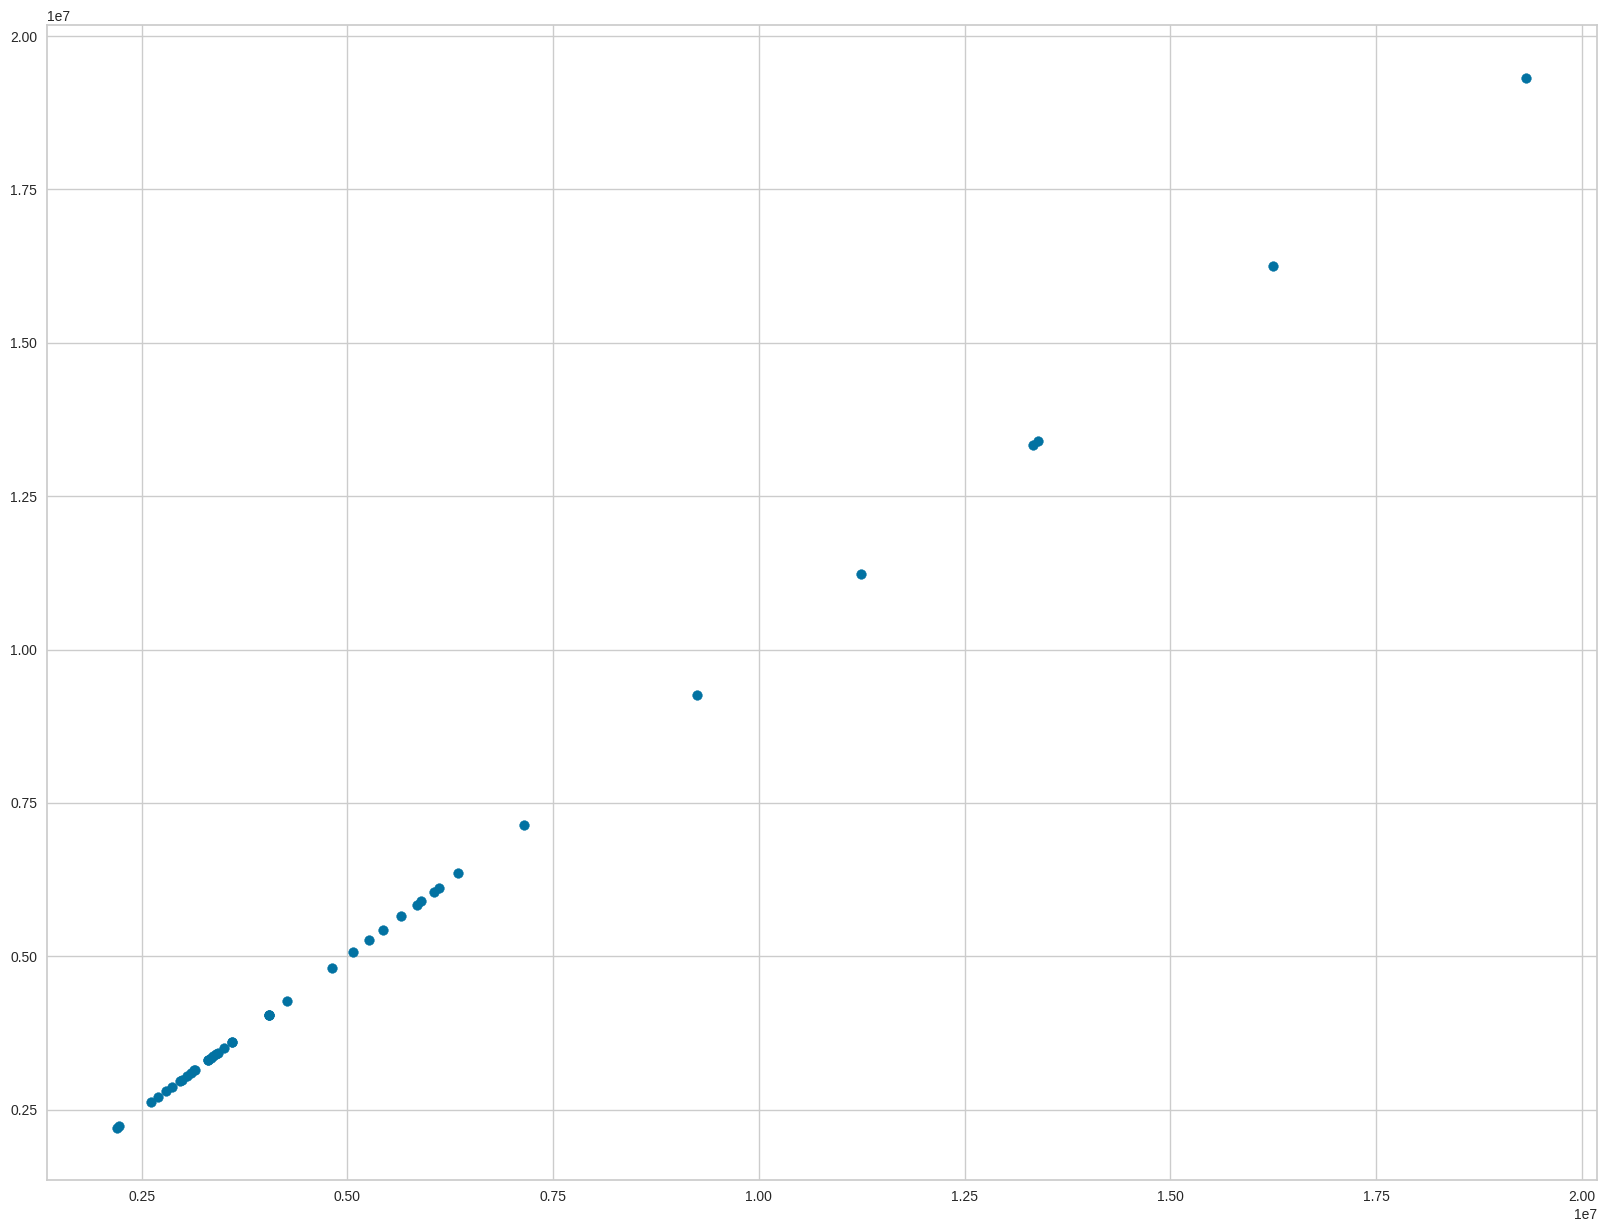

In [ ]:
plt.scatter(y_test, predictions)

<ipython-input-87-4c283b31e3cd>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='INR', ylabel='Density'>

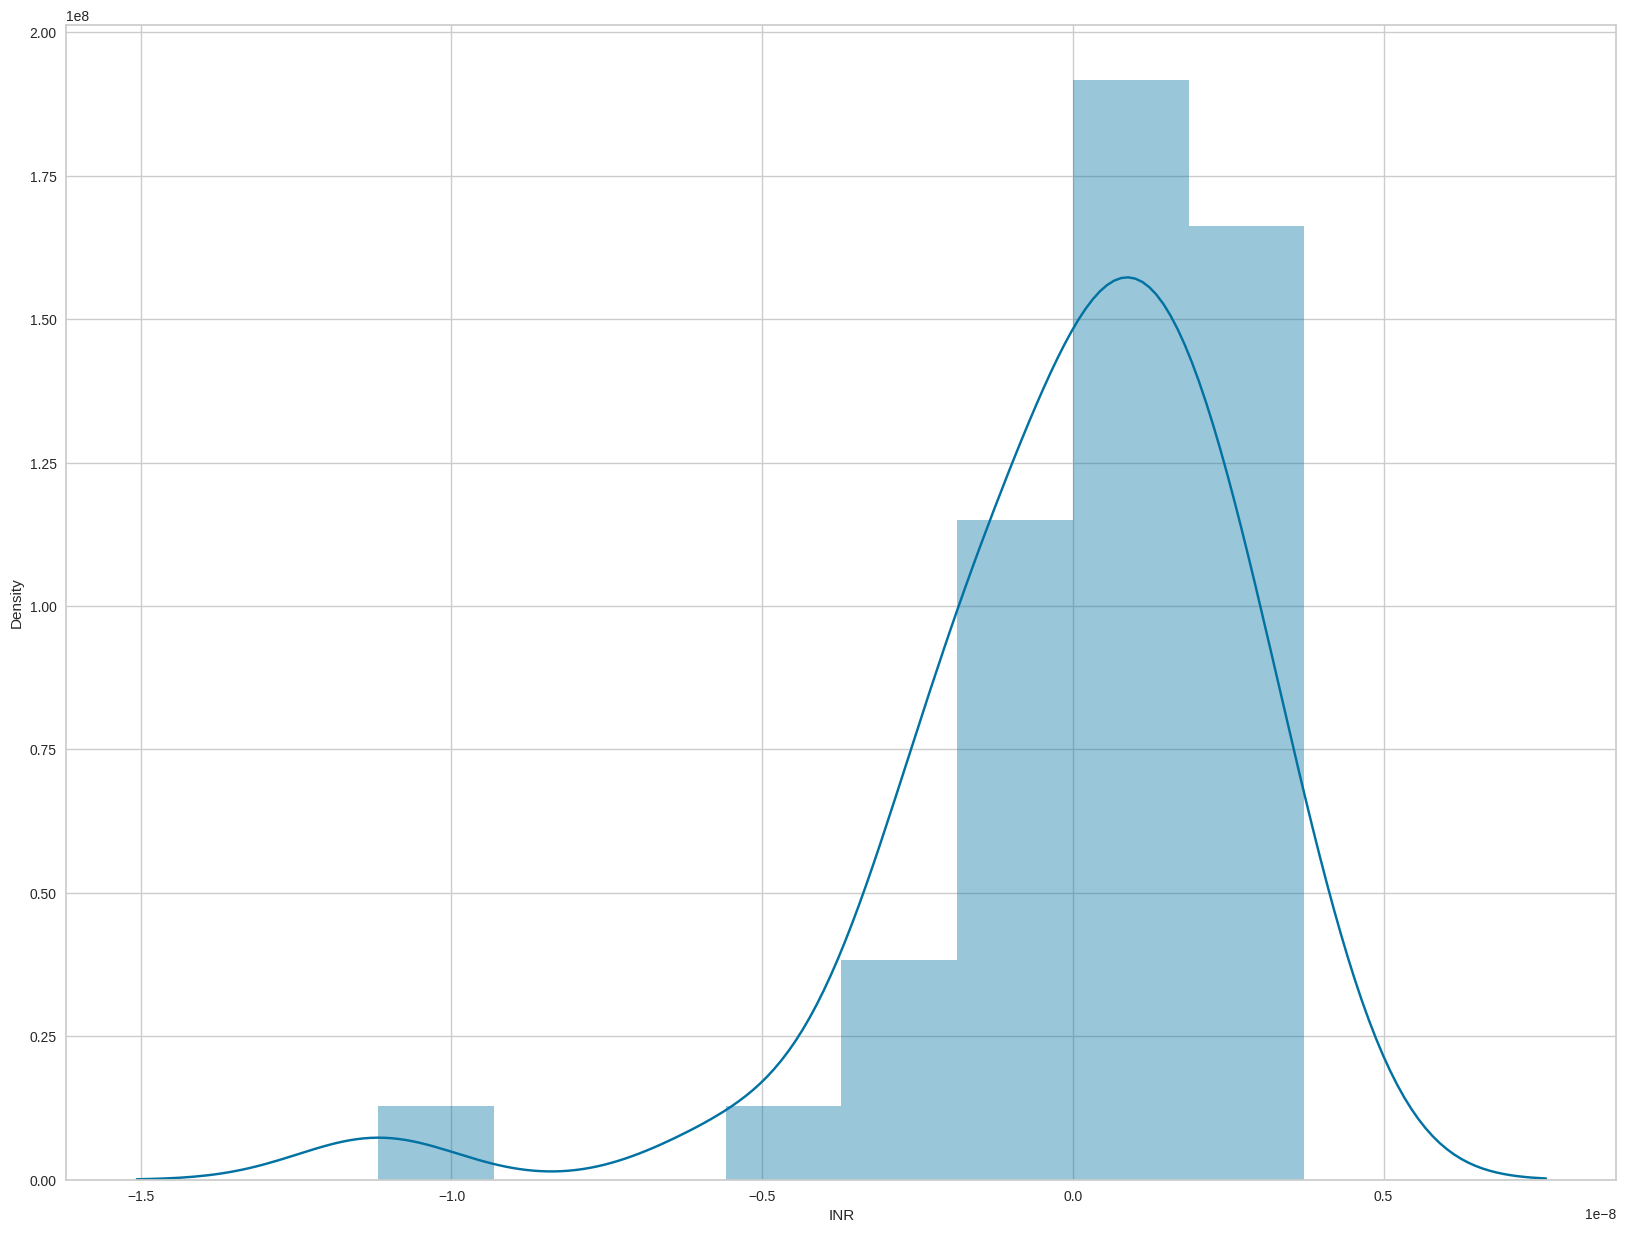

In [ ]:
#Residual histogram plot
sns.distplot((y_test-predictions))

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1.92916819027492e-09
MSE: 7.310620363045116e-18
RMSE: 2.703815889265598e-09


In [ ]:
metrics.mean_absolute_error(y_test,predictions)

1.92916819027492e-09

In [ ]:
metrics.mean_squared_error(y_test,predictions)

7.310620363045116e-18

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2.703815889265598e-09

###DATASET 2

In [5]:
data = pd.read_excel('/content/FEV data.xlsx')

In [6]:
data.head(10)

Car full name     Make                        Model  \
0            Audi e-tron 55 quattro     Audi            e-tron 55 quattro   
1            Audi e-tron 50 quattro     Audi            e-tron 50 quattro   
2             Audi e-tron S quattro     Audi             e-tron S quattro   
3  Audi e-tron Sportback 50 quattro     Audi  e-tron Sportback 50 quattro   
4  Audi e-tron Sportback 55 quattro     Audi  e-tron Sportback 55 quattro   
5   Audi e-tron Sportback S quattro     Audi   e-tron Sportback S quattro   
6                            BMW i3      BMW                           i3   
7                           BMW i3s      BMW                          i3s   
8                           BMW iX3      BMW                          iX3   
9                      Citroën ë-C4  Citroën                         ë-C4   

   Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
0                       345700                360                  664   
1                       308400                313                  540   
2                       414900                503                  973   
3                       319700                313                  540   
4                       357000                360                  664   
5                       426200                503                  973   
6                       169700                170                  250   
7                       184200                184                  270   
8                       282900                286                  400   
9                       125000                136                  260   

        Type of brakes   Drive type  Battery capacity [kWh]  \
0  disc (front + rear)          4WD                 95.0000   
1  disc (front + rear)          4WD                 71.0000   
2  disc (front + rear)          4WD                 95.0000   
3  disc (front + rear)          4WD                 71.0000   
4  disc (front + rear)          4WD                 95.0000   
5  disc (front + rear)          4WD                 95.0000   
6  disc (front + rear)   2WD (rear)                 42.2000   
7  disc (front + rear)   2WD (rear)                 42.2000   
8  disc (front + rear)   2WD (rear)                 80.0000   
9  disc (front + rear)  2WD (front)                 50.0000   

   Range (WLTP) [km]  ...  Permissable gross weight [kg]  \
0                438  ...                      3130.0000   
1                340  ...                      3040.0000   
2                364  ...                      3130.0000   
3                346  ...                      3040.0000   
4                447  ...                      3130.0000   
5                369  ...                      3130.0000   
6                359  ...                      1730.0000   
7                345  ...                      1730.0000   
8                460  ...                      2725.0000   
9                350  ...                      2000.0000   

   Maximum load capacity [kg]  Number of seats  Number of doors  \
0                    640.0000                5                5   
1                    670.0000                5                5   
2                    565.0000                5                5   
3                    640.0000                5                5   
4                    670.0000                5                5   
5                    565.0000                5                5   
6                    440.0000                4                5   
7                    440.0000                4                5   
8                    540.0000                5                5   
9                    459.0000                5                5   

   Tire size [in]  Maximum speed [kph]  Boot capacity (VDA) [l]  \
0              19                  200                 660.0000   
1              19                  190                 660.0000   
2              20                  210                 660.0000  

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


In [9]:
data.isnull().sum()

Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            1
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             8
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]                   1
Acceleration 0-100 kph [s]      

In [17]:
data['Minimal Price (INR)'] = data['Minimal price (gross) [PLN]']*20.18360

In [18]:
data.head(10)

Car full name     Make                        Model  \
0            Audi e-tron 55 quattro     Audi            e-tron 55 quattro   
1            Audi e-tron 50 quattro     Audi            e-tron 50 quattro   
2             Audi e-tron S quattro     Audi             e-tron S quattro   
3  Audi e-tron Sportback 50 quattro     Audi  e-tron Sportback 50 quattro   
4  Audi e-tron Sportback 55 quattro     Audi  e-tron Sportback 55 quattro   
5   Audi e-tron Sportback S quattro     Audi   e-tron Sportback S quattro   
6                            BMW i3      BMW                           i3   
7                           BMW i3s      BMW                          i3s   
8                           BMW iX3      BMW                          iX3   
9                      Citroën ë-C4  Citroën                         ë-C4   

   Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
0                       345700                360                  664   
1                       308400                313                  540   
2                       414900                503                  973   
3                       319700                313                  540   
4                       357000                360                  664   
5                       426200                503                  973   
6                       169700                170                  250   
7                       184200                184                  270   
8                       282900                286                  400   
9                       125000                136                  260   

        Type of brakes   Drive type  Battery capacity [kWh]  \
0  disc (front + rear)          4WD                 95.0000   
1  disc (front + rear)          4WD                 71.0000   
2  disc (front + rear)          4WD                 95.0000   
3  disc (front + rear)          4WD                 71.0000   
4  disc (front + rear)          4WD                 95.0000   
5  disc (front + rear)          4WD                 95.0000   
6  disc (front + rear)   2WD (rear)                 42.2000   
7  disc (front + rear)   2WD (rear)                 42.2000   
8  disc (front + rear)   2WD (rear)                 80.0000   
9  disc (front + rear)  2WD (front)                 50.0000   

   Range (WLTP) [km]  ...  Maximum load capacity [kg]  Number of seats  \
0                438  ...                    640.0000                5   
1                340  ...                    670.0000                5   
2                364  ...                    565.0000                5   
3                346  ...                    640.0000                5   
4                447  ...                    670.0000                5   
5                369  ...                    565.0000                5   
6                359  ...                    440.0000                4   
7                345  ...                    440.0000                4   
8                460  ...                    540.0000                5   
9                350  ...                    459.0000                5   

   Number of doors  Tire size [in]  Maximum speed [kph]  \
0                5              19                  200   
1                5              19                  190   
2                5              20                  210   
3                5              19                  190   
4                5              19                  200   
5                5              20                  210   
6                5              19                  160   
7                5              20                  160   
8                5              19                  180   
9                5              16                  150   

   Boot capacity (VDA) [l]  Acceleration 0-100 kph [s]  \
0                 660.0000                      5.7000   
1                 660.0000                      6.8000   
2                 660.0000

In [19]:
data.describe()

Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
count                      53.0000            53.0000              53.0000   
mean                   246158.5094           269.7736             460.0377   
std                    149187.4852           181.2986             261.6470   
min                     82050.0000            82.0000             160.0000   
25%                    142900.0000           136.0000             260.0000   
50%                    178400.0000           204.0000             362.0000   
75%                    339480.0000           372.0000             640.0000   
max                    794000.0000           772.0000            1140.0000   

       Battery capacity [kWh]  Range (WLTP) [km]  Wheelbase [cm]  Length [cm]  \
count                 53.0000            53.0000         53.0000      53.0000   
mean                  62.3660           376.9057        273.5811     442.5094   
std                   24.1709           118.8179         22.7405      48.8633   
min                   17.6000           148.0000        187.3000     269.5000   
25%                   40.0000           289.0000        258.8000     411.8000   
50%                   58.0000           364.0000        270.0000     447.0000   
75%                   80.0000           450.0000        290.0000     490.1000   
max                  100.0000           652.0000        327.5000     514.0000   

       Width [cm]  Height [cm]  Minimal empty weight [kg]  ...  \
count     53.0000      53.0000                    53.0000  ...   
mean     186.2415     155.4226                  1868.4528  ...   
std       14.2806      11.2754                   470.8809  ...   
min      164.5000     137.8000                  1035.0000  ...   
25%      178.8000     148.1000                  1530.0000  ...   
50%      180.9000     155.6000                  1685.0000  ...   
75%      193.5000     161.5000                  2370.0000  ...   
max      255.8000     191.0000                  2710.0000  ...   

       Maximum load capacity [kg]  Number of seats  Number of doors  \
count                     45.0000          53.0000          53.0000   
mean                     520.4667           4.9057           4.8491   
std                      140.6828           0.8381           0.4556   
min                      290.0000           2.0000           3.0000   
25%                      440.0000           5.0000           5.0000   
50%                      486.0000           5.0000           5.0000   
75%                      575.0000           5.0000           5.0000   
max                     1056.0000           8.0000           5.0000   

       Tire size [in]  Maximum speed [kph]  Boot capacity (VDA) [l]  \
count         53.0000              53.0000                  52.0000   
mean          17.6792             178.1698                 445.0962   
std            1.8685              43.0562                 180.1785   
min           14.0000             123.0000                 171.0000   
25%           16.0000             150.0000                 315.0000   
50%           17.0000             160.0000                 425.0000   
75%           19.0000             200.0000                 558.0000   
max           21.0000             261.0000                 870.0000   

       Acceleration 0-100 kph [s]  Maximum DC charging power [kW]  \
count                     50.0000                         53.0000   
mean                       7.3600                        113.5094   
std                        2.7866                         57.1670   
min                        2.5000                         22.0000   
25%                        4.8750                        100.0000   
50%                        7.7000                        100.0000   
75%                        9.3750                        150.0000   
max                       13.1000                        270.0000   

       mean - Energy consumption [kWh/100 km]  Minimal Price (INR)  
count   

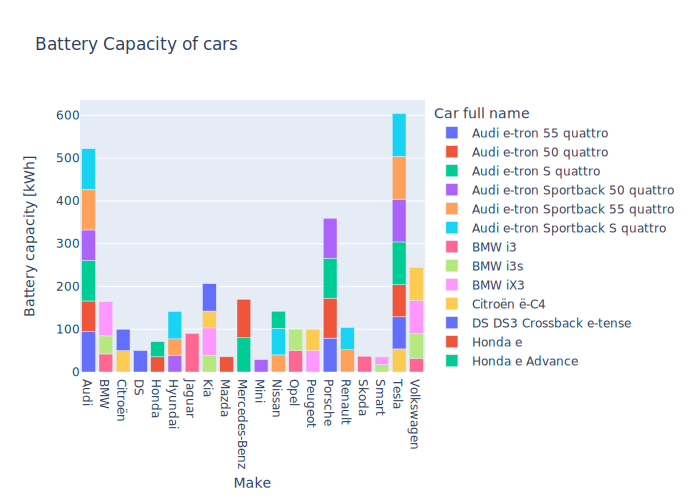

In [25]:
fig = px.bar(data,x='Make',y = 'Battery capacity [kWh]',color = 'Car full name',title = 'Battery Capacity of cars',labels = {'x':'Car Brands','y':'Battery Capacity'})
pio.show(fig)

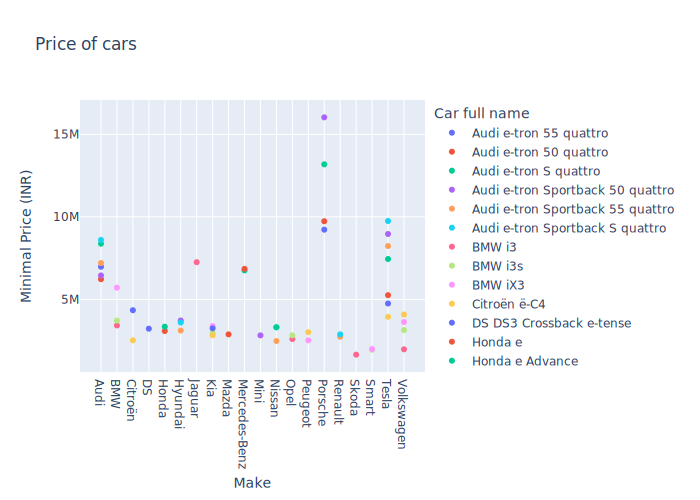

In [26]:
fig = px.scatter(data,x='Make',y = 'Minimal Price (INR)',color = 'Car full name',title = 'Price of cars',labels = {'x':'Prices','y':'Cars'})
pio.show(fig)

<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

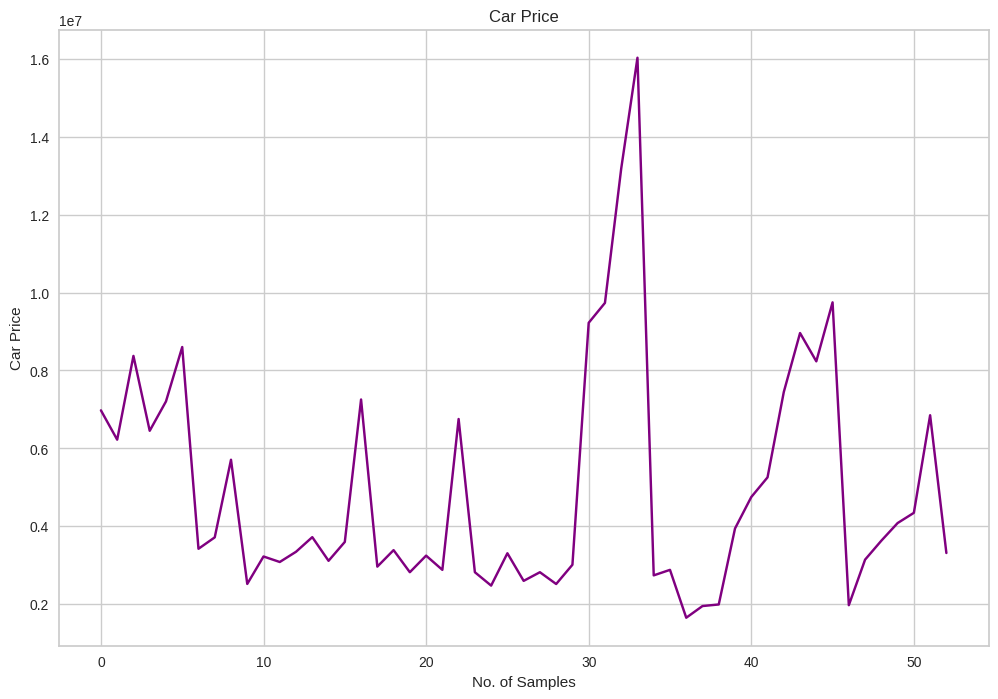

In [23]:
data['Minimal Price (INR)'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'purple')

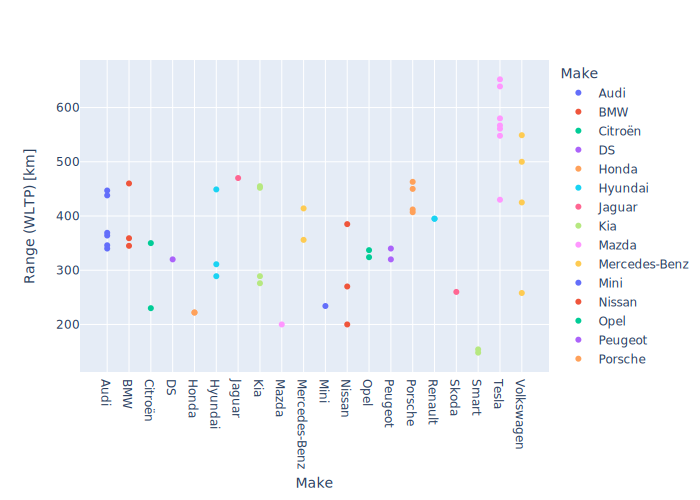

In [27]:
fig = px.scatter(data,x = 'Make',y = 'Range (WLTP) [km]',color = 'Make',hover_data=['Engine power [KM]','Maximum torque [Nm]'])
pio.show(fig)

<ipython-input-28-474c3664ff79>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

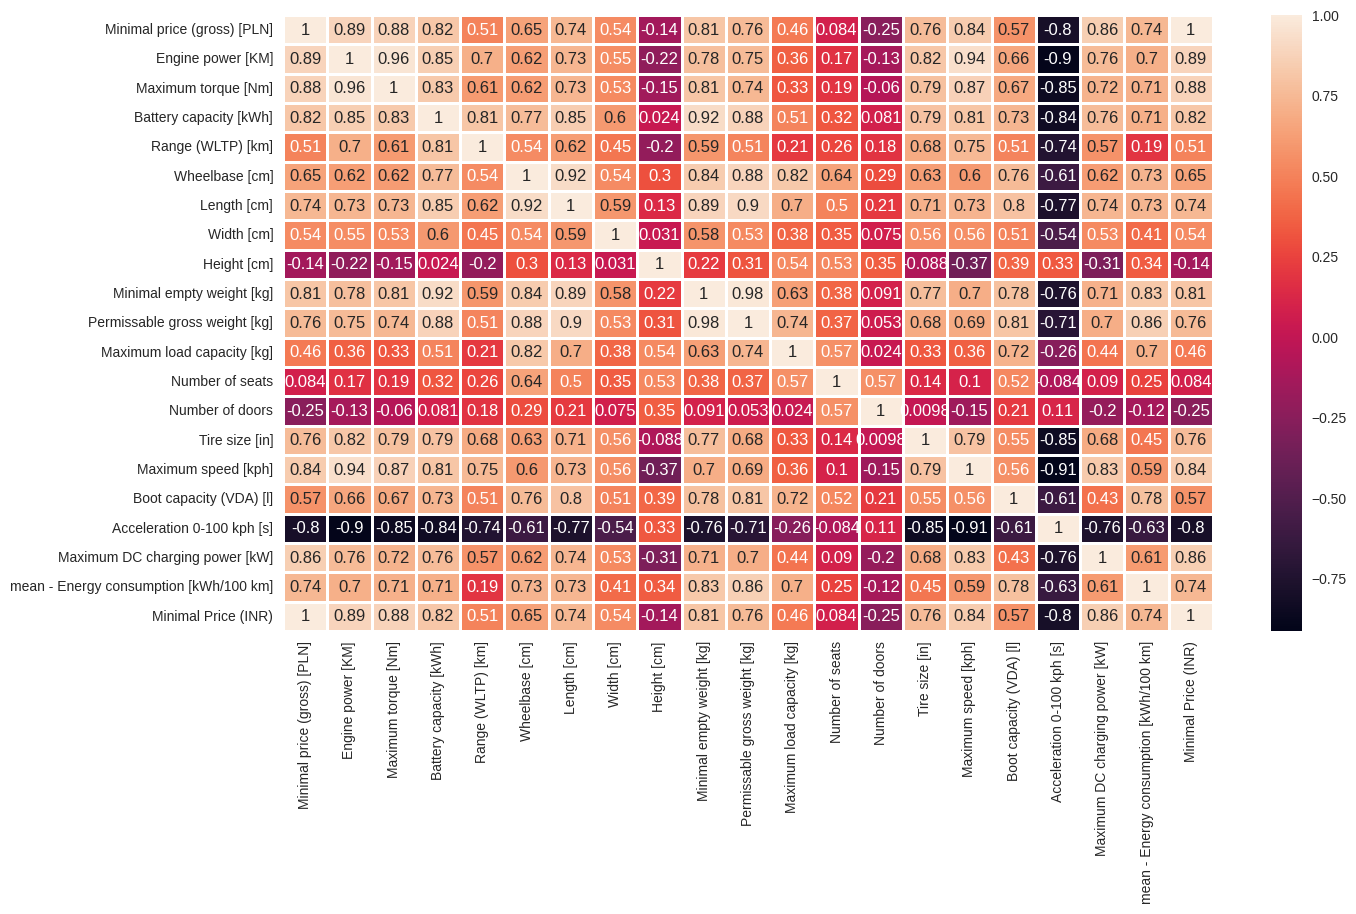

In [28]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),linewidths=1,linecolor='white',annot=True)

In [32]:
data['Number of seats'].unique()

array([5, 4, 2, 7, 8, 6])

Text(0.5, 1.0, 'Seats')

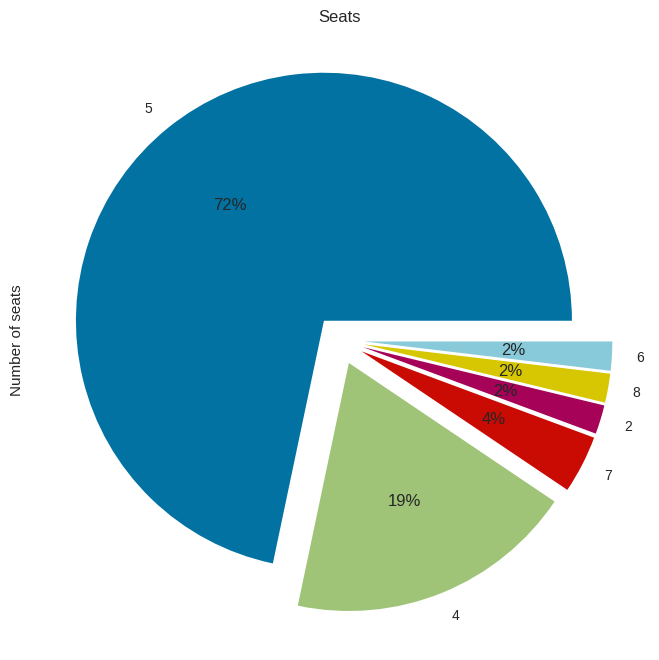

In [33]:
data['Number of seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

In [34]:
data['Number of doors'].unique()

array([5, 3, 4])

Text(0.5, 1.0, 'Doors')

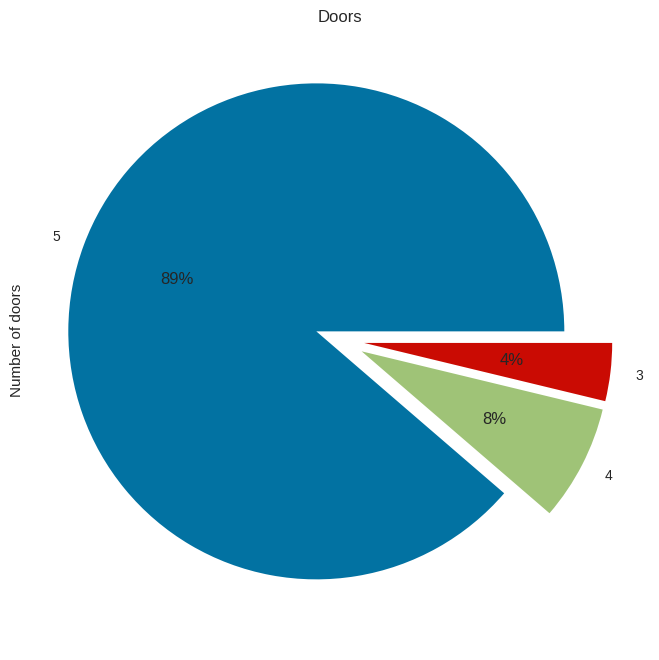

In [35]:
data['Number of doors'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1))
plt.title('Doors')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Audi'),
  Text(1, 0, 'BMW'),
  Text(2, 0, 'Citroën'),
  Text(3, 0, 'DS'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Hyundai'),
  Text(6, 0, 'Jaguar'),
  Text(7, 0, 'Kia'),
  Text(8, 0, 'Mazda'),
  Text(9, 0, 'Mercedes-Benz'),
  Text(10, 0, 'Mini'),
  Text(11, 0, 'Nissan'),
  Text(12, 0, 'Opel'),
  Text(13, 0, 'Peugeot'),
  Text(14, 0, 'Porsche'),
  Text(15, 0, 'Renault'),
  Text(16, 0, 'Skoda'),
  Text(17, 0, 'Smart'),
  Text(18, 0, 'Tesla'),
  Text(19, 0, 'Volkswagen')])

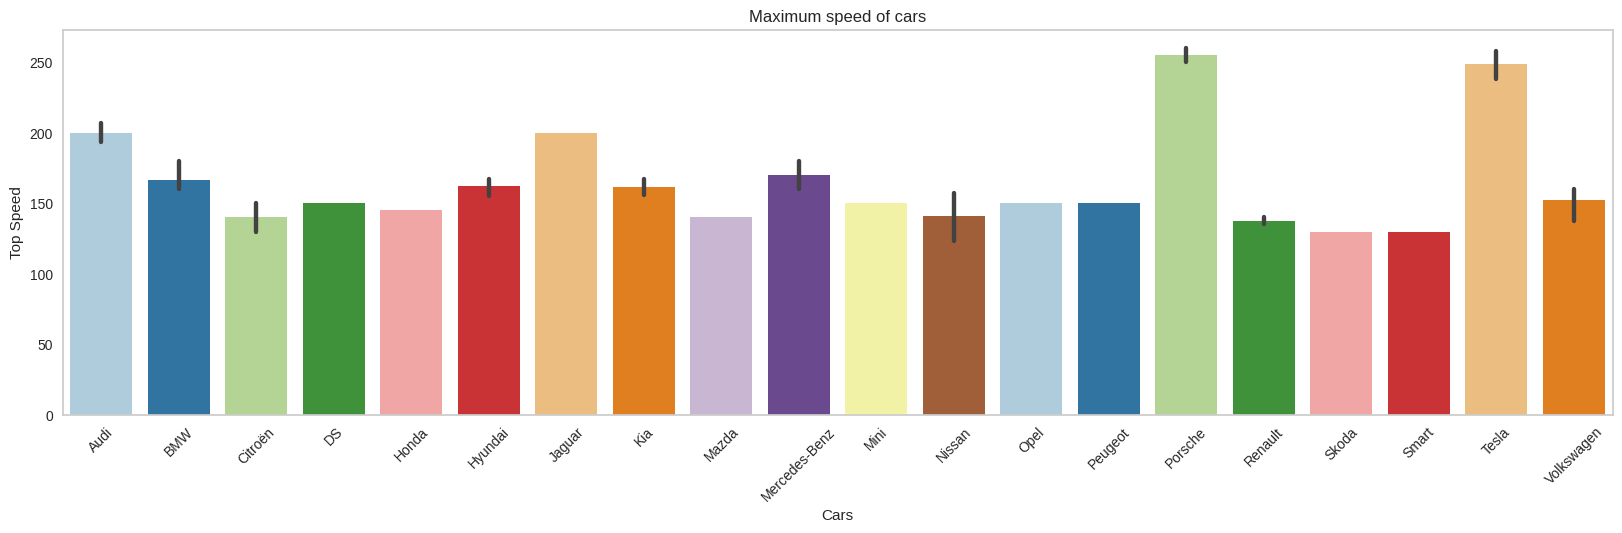

In [36]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Make',y='Maximum speed [kph]',data=data,palette='Paired')
plt.grid(axis='y')
plt.title('Maximum speed of cars')
plt.xlabel('Cars')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning:

All-NaN slice encountered



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Audi'),
  Text(1, 0, 'BMW'),
  Text(2, 0, 'Citroën'),
  Text(3, 0, 'DS'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Hyundai'),
  Text(6, 0, 'Jaguar'),
  Text(7, 0, 'Kia'),
  Text(8, 0, 'Mazda'),
  Text(9, 0, 'Mercedes-Benz'),
  Text(10, 0, 'Mini'),
  Text(11, 0, 'Nissan'),
  Text(12, 0, 'Opel'),
  Text(13, 0, 'Peugeot'),
  Text(14, 0, 'Porsche'),
  Text(15, 0, 'Renault'),
  Text(16, 0, 'Skoda'),
  Text(17, 0, 'Smart'),
  Text(18, 0, 'Tesla'),
  Text(19, 0, 'Volkswagen')])

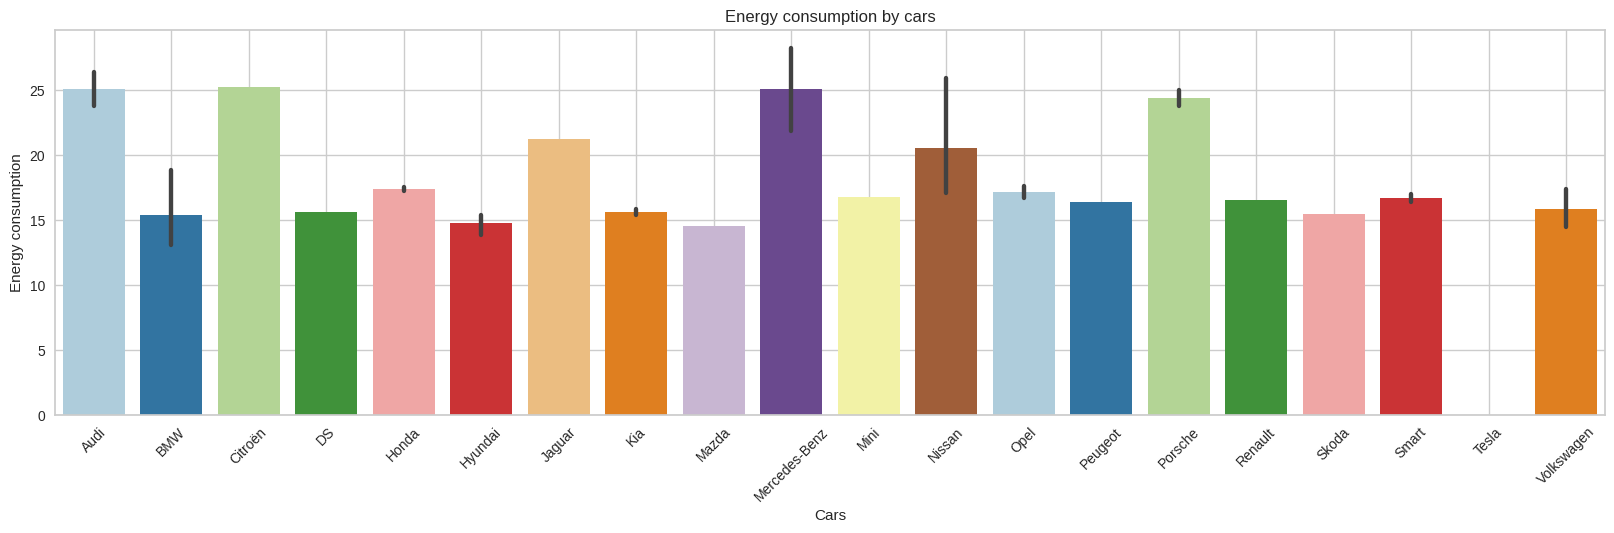

In [38]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Make',y='mean - Energy consumption [kWh/100 km]',data=data,palette='Paired')
plt.grid(axis='x')
plt.title('Energy consumption by cars')
plt.xlabel('Cars')
plt.ylabel('Energy consumption')
plt.xticks(rotation=45)

In [48]:
data = data.fillna(0)

In [49]:
x=data[['Engine power [KM]','Battery capacity [kWh]','Maximum speed [kph]','Acceleration 0-100 kph [s]','mean - Energy consumption [kWh/100 km]','Maximum DC charging power [kW]']]
y=data['Minimal Price (INR)']

In [50]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [53]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Minimal Price (INR)   R-squared:                       0.928
Model:                             OLS   Adj. R-squared:                  0.919
Method:                  Least Squares   F-statistic:                     99.12
Date:                 Tue, 04 Jul 2023   Prob (F-statistic):           1.27e-24
Time:                         13:29:26   Log-Likelihood:                -795.54
No. Observations:                   53   AIC:                             1605.
Df Residuals:                       46   BIC:                             1619.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -4.283e+04   1.67e+06     -0.026      0.980   -3.41e+06    3.32e+06
Engine power [KM]                       1.254e+04   2311.425      5.427      0.000    7891.706    1.72e+04
Battery capacity [kWh]                 -1.191e+04   1.07e+04     -1.116      0.270   -3.34e+04    9565.168
Maximum speed [kph]                    -3892.8287    1.2e+04     -0.323      0.748   -2.81e+04    2.03e+04
Acceleration 0-100 kph [s]             -6.309e+04    5.2e+04     -1.212      0.232   -1.68e+05    4.17e+04
mean - Energy consumption [kWh/100 km]  9.418e+04   1.98e+04      4.763      0.000    5.44e+04    1.34e+05
Maximum DC charging power [kW]          1.776e+04   4974.947      3.571      0.001    7750.734    2.78e+04
==============================================================================
Omnibus:                       26.288   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.564
Skew:                           1.478   Prob(JB):                     2.34e-12
Kurtosis:                       6.939   Cond. No.                     5.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [52]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [54]:
r2=(r2_score(y_test,pred))
print(r2*100)

83.99384018077691


In [57]:
data.mean(axis = 0)

<ipython-input-57-1f5f4b5c2b1f>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Minimal price (gross) [PLN]               246158.5094
Engine power [KM]                            269.7736
Maximum torque [Nm]                          460.0377
Battery capacity [kWh]                        62.3660
Range (WLTP) [km]                            376.9057
Wheelbase [cm]                               273.5811
Length [cm]                                  442.5094
Width [cm]                                   186.2415
Height [cm]                                  155.4226
Minimal empty weight [kg]                   1868.4528
Permissable gross weight [kg]               1943.3585
Maximum load capacity [kg]                   441.9057
Number of seats                                4.9057
Number of doors                                4.8491
Tire size [in]                                17.6792
Maximum speed [kph]                          178.1698
Boot capacity (VDA) [l]                      436.6981
Acceleration 0-100 kph [s]                     6.9434
Maximum DC charging power [k